In [152]:
%%HTML
<style>
    /* style for presentation only */
    .reveal .rendered_html table { font-size: 20px }
    /* centre images */
    .reveal .rendered_html img {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
        horizontal-align: middle;
        margin-left: auto;
        margin-right: auto;
    }
</style> 

In [2]:
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
graph_figsize = (10,6)                    # I'm forgetful and lazy
plt.rcParams.update({'figure.figsize': graph_figsize})

%matplotlib nbagg
                                          # Jupyter Magics!
import geopandas as gp
import urllib.request
import zipfile
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
            
import moviepy.editor as mpy
import moviepy.video as mpyv

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from datetime import datetime
import cufflinks
init_notebook_mode(connected=False)
pd.Series([0,1,2,3,4,5]).iplot()

# Idiots Guide to (Open) Data Science

Andrew Bolster 
* [bolster.online](https://bolster.online)
* Tweets [@bolster](https://twitter.bolster.online)
* GitHubs at [andrewbolster](https://github.com/andrewbolster)
* Machine Learning Team Lead at [WhiteHatSec](https://www.whitehatsec.com) 
 * **We're hiring** (Placements also available)
* Plays at [Farset Labs](https://www.farsetlabs.org.uk)
* **[THIS NOTEBOOK IS AT present.bolster.online](http://present.bolster.online)**
* [Also available in source at presentgh.bolster.online](http://presentgh.bolster.online)

## What is Data Science?
* "Deriving actionable business and operational insights from multi-modal data sources"

* AKA: "Turning Numbers into Other Numbers, and occasionally pretty graphs"

![](img/decline.png)

## Data Science in Northern Ireland
![](img/dozens.gif)

### Vibrant Corporate Ecosystem

* [Analytics Engines](http://www.analyticsengines.com/)
* [AquaQ Analytics](https://www.aquaq.co.uk/)
* [**WhiteHat Security**😜](https://www.whitehatsec.com)
* [Kainos](https://www.kainos.com/)
* [Flexera|BDNA](https://www.bdna.com/category/flexera/)
* [First Derivitives](https://www.firstderivatives.com/)
* [Neueda](http://www.neueda.com/)
* [Sensum](https://sensum.co/)
* [BrainwaveBank](https://www.brainwavebank.com/)
* Many Many _Many_ More

### Open Source / Meetup Ecosystem too
***Hint: If you really want to learn data science, go to/get involved in some of these***

* [IoT Belfast](https://www.meetup.com/IOTBelfast/)
* [IoT Alliance](https://www.meetup.com/Belfast-New-Technology-Meetup/)
* [PyBelfast](https://www.meetup.com/PyBelfast/)
* [Code Co-op NI](https://www.meetup.com/CodeCoop-NI/)
* [Data Art Belfast](https://www.meetup.com/Data-Art-Belfast/)
* [Big Data Belfast Breakout](https://www.meetup.com/Big-Data-Belfast-Breakout/)
* [Women Who Code Belfast](https://www.meetup.com/Women-Who-Code-Belfast/)
* [Docker Belfast](https://www.meetup.com/Docker-Belfast/)
* [DevOps Belfast](https://www.meetup.com/DevOps-Belfast/)
* [DevSecOps Belfast](https://www.meetup.com/devsecops-belfast/)


***Hint the Second: These are the _best_ ways to get a job in the field***

### Engaged local Government/ComVol support

* [OpenData NI](https://www.opendatani.gov.uk/)
* [DetailData](http://data.nicva.org/)
* [Code4Good](https://wedonthaveasiteyet.lol)
* [DoF Open Data Advisory Board]()


### NI Data Science on the world stage

* [Big Data Belfast Conference](http://www.bigdatabelfast.com/)
* [ODCamp](http://odcamp.co.uk/)
* [TIMON Hackathon](https://www.eventbrite.co.uk/e/timon-open-transport-hackathon-tickets-40149226417#)

# What is Open Data?

> Open data and content can be freely used, modified, and shared by anyone for any purpose - [The Open Definition](https://opendefinition.org/)

> Open data is the idea that some data should be freely available to everyone to use and republish as they wish, without restrictions from copyright, patents or other mechanisms of control. - [Wikipedia](https://en.wikipedia.org/wiki/Open_data)

> Open data is data that’s available to everyone to access, use and share. Yep, even your nan.- [The Open Data Institute](https://theodi.org/article/what-is-open-data-and-why-should-we-care/)

## Key Principles of Open Data

* Open
* Accessible
* Available
* Understandable
* Traceable

## What's the point?

(Following slides stolen shamelessly but with attribution from [The ODI](https://theodi.org/article/what-is-open-data-and-why-should-we-care/), because they're awesome

![](img/odi_perm.png)


### Open data should be easy to access. Especially for your nan.

> Open data is only useful if it’s shared in ways that people can actually understand. **It needs to be shared in a standardised format and easily traced back to where it came from.**

![](img/homer.webp)

### Open data isn’t the same as big data, but big data can be open data too

> When people talk about ‘big data’ they mean a lot of data. Obviously. But ‘big data’, like government statistics on health care, is often closed to the public (or expensive to access, like the terrifyingly-named TWITTER FIREHOSE). **Opening up big data lets people use it to spot trends, fill gaps and improve services.**

![](img/data.jpg)

### Oh, and it’s also not the same as ‘shared data’

> If you’re worried about big companies being fed all your private details, that’s got nothing to do with open data. Groups sharing information with each other is different from opening it up for all to access. **Your private data should only be open if you choose to share it.** (But if you want to know who’s accessing or sharing your data, open data can help.)

![](img/rugrats.gif)

### Open data is good for democracy

>If citizens know about their governments they can hold leaders to account, make more informed decisions and demand better services. **Open data can also help governments stay on their toes and make better policies for society, the economy and the environment.**

![](img/vote.webp)

### Open data can help fight crime
> It’s helped people in London to track [stolen bikes](https://www.nesta.org.uk/blog/check-that-bike-wins-crime-justice-open-data-challenge/) and police in [Vancouver](http://www.cbc.ca/bc/features/vancouver-property-crime-map/) to stay one step ahead of criminals.

![](img/superman.webp)

### Open data is good for your health

> With tools like [FoodTradeMenu](https://www.socialtech.org.uk/projects/food-trade-menu/) using it to help restaurants make sure they don’t serve you food you’re allergic to without realising.

![](img/sneeze.webp)

### Open data can save lives

> It helps groups to [coordinate aid delivery in humanitarian disasters](https://www.sciencedirect.com/science/article/pii/S0740624X13000737).

![](img/aid.jpg)

### Open data helps you get around your city, and saves you money

> Apps like [CityMapper](https://citymapper.com) use open data from groups like Transport for London to help you find the quickest and cheapest way to get from A to B. Even maps can be open, like OpenStreetMap, which powers map data for websites and humanitarian crises relief around the world.

![](img/dr.webp)

<center>__No, NI isn't on CityMapper, woooooooo__</center>

### Open data is actually really pretty

> [Look](https://nats.aero/blog/2014/03/europe-24-air-traffic-data-visualisation/) what happened when NATS used UK radar and European flight plan data to visualise air traffic on a typical summer’s day in 2013.

![https://nats.aero/blog/2014/03/europe-24-air-traffic-data-visualisation/](img/nats.jpg)

## Scales of Data Openness

This is a complex area, if you care, google for ["5 star data"](http://5stardata.info/en/)

TL;DR 
![](img/stars.png)

### And how shit is NI? Cus we're shit at everything right?

![https://index.okfn.org/place/nir/](img/nidata.png)


### NOTBAD.JPG

![](img/notbad.png)

# What is Data Driven Journalism?

> ‘Data journalism’ only differs from ‘words journalism’ in that we use a different kit. We all sniff out, report, and relate stories for a living. It’s like ‘photo journalism’; just swap the camera for a laptop. - Brian Boyer, Chicago Tribune

> [...] providing information and analysis to help inform us all about important issues of the day. - Aron Pilhofer, New York Times

> Using Open Data and Data Science principles to ask, analyse and answer complex or contentious questions or areas of inquiry using available evidence. - Bolster, Here

## What do you what to know?

This is usually the wrong question;

## What do you want to know *more about*?
![](img/google-niedu.png)

## What relevant data is available?
![](img/opendata-fp.png)

![](img/opendata-places.png)

![](img/opendata-pp.png)

## So what do we *think* we have at the moment?

* List of schools with at least council/constitutency locations and postcodes
* Enrolements per school for 2016/17
* Demographic comparisons (R/FSM/SEN 0+ or 5)
* A 'churn' rate (newcomers/movers/immigration)

## What else could we do with?

* More years, ideally same format
    * _What schools have fewer places per/k council pop?_
* Correlations to deprivation
* Correlations to monoculture/political alignment
* Correlations to population *change*
* Correlations to achievement/mobility
* Correlations to claiment count etc.

I *think* we can get most of these... but first things first

# Extraction, Transformation and Loading

* Get the data
* Clean the data
* Store the data

Gov Open Data is notoriously difficult to 'wander around'

## Extraction
When in doubt, bring in `pandas`
![](img/panda.png)

### Easy mode: `read_csv`

In [3]:
import pandas as pd
url_from_odni = "https://www.opendatani.gov.uk/dataset/6058be29-b2e1-4253-bab8-8a018568560a/resource/b4fcfed1-2dc1-4f61-8968-573535522d53/download/school-level-post-primary-reference-data.csv"
pd.read_csv(url_from_odni)

De ref                                     school name  \
0    1210014                     Ashfield Girls' High School   
1    1210015                      Ashfield Boys' High School   
2    1210021                  Belfast Model School For Girls   
3    1210022                      Belfast Boys' Model School   
4    1230026                   St Patrick's College, Belfast   
5    1230053               St Louise's Comprehensive College   
6    1230089                     Little Flower Girls' School   
7    1230104                                   Mercy College   
8    1230130                     St Rose?s Dominican College   
9    1230146              Christian Brothers School, Belfast   
10   1230155                      St Genevieve's High School   
11   1230182                             De La Salle College   
12   1230262                          Corpus Christi College   
13   1230275                    St Joseph's College, Belfast   
14   1240291                                Colaiste Feirste   
15   1260269                               Hazelwood College   
16   1260294                       Malone Integrated College   
17   1410079                        Grosvenor Grammar School   
18   1410270                              Wellington College   
19   1410315                           Bloomfield Collegiate   
20   1420020                                Campbell College   
21   1420021  St Mary's Christian Brothers' Grammar, Belfast   
22   1420022                               Methodist College   
23   1420027        The Royal Belfast Academical Institution   
24   1420028                           Belfast Royal Academy   
25   1420029               St Dominic's High School, Belfast   
26   1420030                   St Malachy's College, Belfast   
27   1420082                      Dominican College, Belfast   
28   1420089                      Strathearn School, Belfast   
29   1420095                         Rathmore Grammar School   
..       ...                                             ...   
171  5230076                 St Patrick's College, Banbridge   
172  5230108                    St Mary's High School, Newry   
173  5230135                           St Mark's High School   
174  5230152                         St Ciaran's High School   
175  5230157                St Paul's High School, Bessbrook   
176  5230167            St Joseph's High School, Crossmaglen   
177  5230187                 St Patrick's High School, Keady   
178  5230192                 St Joseph's College, Coalisland   
179  5230213                    Lismore Comprehensive School   
180  5230218                          St Catherine's College   
181  5230256                                Drumcree College   
182  5230278                            Holy Trinity College   
183  5230293                 St Patrick's College, Dungannon   
184  5250216                            Brownlow Int College   
185  5260285                   New-Bridge Integrated College   
186  5260286                    Integrated College Dungannon   
187  5410013                               Banbridge Academy   
188  5410057                                  Lurgan College   
189  5410067                               Portadown College   
190  5420045                St Louis Grammar School, Kilkeel   
191  5420059         Abbey Christian Brothers Grammar School   
192  5420060                       Our Lady's Grammar School   
193  5420062                      St Colman's College, Newry   
194  5420073  St Joseph's Convent Grammar School, Donaghmore   
195  5420076              Sacred Heart Grammar School, Newry   
196  5420260                     The Royal School, Dungannon   
197  5420263                        The Royal School, Armagh   
198  5420268             St Patrick's Grammar School, Armagh   
199  5420304                 St Patrick's Academy, Dungannon   
200  5420314                              St Ronan?s College   

                   address 1         

### Hardmode: API's

In [4]:
from ckanapi import RemoteCKAN # it's on pip
def build_odni_connection():
    """Be nice to OpenDataNI and tell them how old I am. (And that it's me)"""
    version_no = (pd.to_datetime('now') -
    pd.to_datetime('1988/05/17')).days/365
    ua = f'@Bolster/{version_no:.2f} (+http://bolster.online/)'
    return RemoteCKAN('https://www.opendatani.gov.uk/', user_agent=ua)


In [5]:
odni = build_odni_connection()

odni.action.package_list()

['2011-census-microdata-sample-of-anonymised-records-teaching-file',
 '2018-based-population-projections-for-northern-ireland',
 'a26-dualling-lidar',
 'a6-lidar',
 'active-places-ni-sports-facilities-database',
 'activity-centre-ccgbc',
 'adult-bmi-health-survey-northern-ireland',
 'adult-magistrates-defendants-dealt-with',
 'advice-centres',
 'air-quality-monitoring-stations',
 'analysis-of-the-trees-of-belfast',
 'anbc-car-parking',
 'anbc-local-nature-reserves',
 'annual-survey-of-hours-and-earnings',
 'anti-social-behaviour-incidents-recorded-by-the-police-in-northern-ireland',
 'antrim-and-newtownabbey-borough-council-assets',
 'antrim-and-newtownabbey-borough-council-bring-bank-locations',
 'antrim-newtownabbey-borough-council-assets',
 'applications-by-position-applied-for-2015-16',
 'applications-by-type-town-and-country',
 'approved-venues-for-civil-ceremonies-in-causeway-coast-and-glens-borough-council-2016',
 'ards-and-north-down-borough-council-car-parks',
 'ards-and-north

In [6]:
resource =  'school-census-post-primary'

dfs = {}
for dataset in odni.action.package_show(id=resource)['resources']:
    df  = pd.read_csv(dataset['url'], index_col=False)
    dfs[dataset['name']] = df
print(list(dfs.keys()))

['School Census - post primary - Reference data', 'School Census - post primary - enrolments', 'School Census - post primary - Free School Meal entitlement', 'School Census - post primary - SEN', 'School Census - post Primary - Religion', 'School Census - post - Primary - newcomers']


In [7]:
dataset

{'mimetype': None,
 'cache_url': None,
 'hash': '',
 'description': 'School Census information - post primary - newcomers to the school',
 'name': 'School Census - post - Primary - newcomers',
 'format': 'CSV',
 'url': 'https://cc-p-ni.ckan.io/dataset/6058be29-b2e1-4253-bab8-8a018568560a/resource/3f83c61f-e2c1-4ec6-b5fb-1251e72afcba/download/school-level-post-primary-newcomers-2016.csv',
 'datastore_active': True,
 'cache_last_updated': None,
 'package_id': '6058be29-b2e1-4253-bab8-8a018568560a',
 'created': '2017-02-28T15:44:16.253495',
 'state': 'active',
 'mimetype_inner': None,
 'last_modified': None,
 'position': 5,
 'revision_id': '5bbdfb85-b2b4-419b-84f8-73f46ec4965b',
 'url_type': 'upload',
 'id': '3f83c61f-e2c1-4ec6-b5fb-1251e72afcba',
 'resource_type': None,
 'size': None}

### Those who ignore history...
There's a problem; We want to know about change over time.

![](img/doe_data_list.png)

[Dept of Ed have this data 2009-18 on their website in Excel format](https://www.education-ni.gov.uk/articles/school-enrolments-school-level-data)

OpenDataNI *do not* 😭

### We must deeeeel weeeth eet

![](img/fine.jpg)

In [8]:
test_data = "https://www.education-ni.gov.uk/sites/default/files/publications/education/School%20level%20-%20post%20primary%20schools%20data%20supp%201718.xls"
pd.read_excel(test_data).head()

Data are collected annually through the School census exercise. Unnamed: 1
0  This takes place in early October, when each s...                     NaN
1  In 2017/18, the school census date was 6th Oct...                     NaN
2  Among the information collected are details on...                     NaN
3  Statistics produced from the school census exe...                     NaN
4                                                NaN                     NaN

### Common Data Extraction Hellscapes

* Inconsistent naming conventions
* Inconsistent format conventions
* Inconsistent schema conventions
* Inconsistent lexical conventions
* Inconsistent *policy changes*
* Shifting *definitions/classifications*
* Lack of meta-linkage during all of the above changes

### Spot the difference...

* `School%20level%20-%20post%20primary%20schools%20data%20supp%201718.xls`
* `School%20level%20-%20post%20primary%20schools%20data%201617%20supp_0.XLS`

* order of fields (`supp 1718` vs `201617 supp_0`)
* extra junk (`supp` vs `supp_0`)
* inconstent extensions (`xls` vs `XLS`)

### Web Crawling to the rescue!

![](img/doe_data_list.png)

In [9]:
from bs4 import BeautifulSoup
import requests

base_url="https://www.education-ni.gov.uk"

listing_path = "/articles/school-enrolments-school-level-data"
soup = BeautifulSoup(requests.get(base_url+listing_path).text, 'lxml')
for link in soup.find_all('a'):
    if 'School enrolments - school level data 20' in ' '.join(map(str,link.contents)):
        print(link)

<a href="https://www.education-ni.gov.uk/node/37331">School enrolments - school level data 2018/19</a>
<a href="/publications/school-enrolments-school-level-data-201718">School enrolments - school level data 2017/18</a>
<a href="/publications/school-enrolments-school-level-data-201617">School enrolments - school level data 2016/17</a>
<a href="/publications/school-enrolments-school-level-data-201516">School enrolments - school level data 2015/16</a>
<a href="/publications/school-enrolments-school-level-data-201415">School enrolments - school level data 2014/15</a>
<a href="/publications/school-enrolments-school-level-data-201314">School enrolments - school level data 2013/14</a>
<a href="/publications/school-enrolments-school-level-data-201213">School enrolments - school level data 2012/13</a>
<a href="/publications/school-enrolments-school-level-data-201112">School enrolments - school level data 2011/12</a>
<a href="/publications/school-enrolments-school-level-data-201011">School enro

![](img/yey_laura.webp)

### Then for each of those, get the href associated with the year

In [11]:
soup = BeautifulSoup(requests.get(base_url+listing_path).text, 'lxml')
year_urls = {}
for link in soup.find_all('a'):
    contents = ' '.join(map(str,link.contents))
    if 'School enrolments - school level data 20' in contents:
        #year = link.get('href')[-6:-2]
        year = link.get_text()[-7:-3]
        year_urls[int(year)] = link.get('href')
year_urls

{2018: 'https://www.education-ni.gov.uk/node/37331',
 2017: '/publications/school-enrolments-school-level-data-201718',
 2016: '/publications/school-enrolments-school-level-data-201617',
 2015: '/publications/school-enrolments-school-level-data-201516',
 2014: '/publications/school-enrolments-school-level-data-201415',
 2013: '/publications/school-enrolments-school-level-data-201314',
 2012: '/publications/school-enrolments-school-level-data-201213',
 2011: '/publications/school-enrolments-school-level-data-201112',
 2010: '/publications/school-enrolments-school-level-data-201011',
 2009: '/publications/school-enrolments-school-level-data-200910'}

### Then walk *those* pages and grab the Excel files...
Using `urllib.request.urlretrieve` to store them on the local filesystem

In [13]:
import urllib.request
from pathlib import Path
from collections import defaultdict
year_files = defaultdict(list)

dest = Path('./data/education-ni/')
for year, path in year_urls.items():
    dest.joinpath(str(year)).mkdir(parents=True, exist_ok=True)
    if path.startswith('http'): #new docs use real references
        soup = BeautifulSoup(requests.get(path).text, 'lxml')
    else:
        soup = BeautifulSoup(requests.get(base_url+path).text, 'lxml')
    for link in soup.find_all('a'):
        href=link.get('href',"")
        filename = href.split('/')[-1]
        contents = ' '.join(map(str,link.contents))
        if 'xls' in href.split('.')[-1].lower():
            # See this requirement right 👆
            # Mix of xls, XLSX, xlsx and XLS
            if not dest.joinpath(str(year),filename).exists():
                urllib.request.urlretrieve(href, dest.joinpath(str(year),filename))
            year_files[year].append(filename)
    print(f"{year}:{len(year_files[year])} docs")

2018:8 docs
2017:8 docs
2016:8 docs
2015:5 docs
2014:5 docs
2013:5 docs
2012:5 docs
2011:5 docs
2010:5 docs
2009:5 docs


## Transformation

We've technically 'Extracted' the data we wanted from the source,

Clean and twist the data until it's useful

This is the most frustrating part of being a data scientist/engineer...

![](img/frustrated.webp)

### Quick inspection of filename 'conventions'

In [14]:
for year, filenames in year_files.items():
    for file in filenames:
        print(f"{year}:/{file}")

2018:/School%20level%20-%20nursery%20schools%20data%201819.XLSX
2018:/School%20level%20-%20pre%20school%20data%201819.XLSX
2018:/Copy%20of%20School%20level%20-%20primary%20schools%20data%201819.XLSX
2018:/School%20level%20-%20post%20primary%20schools%20data%201819.XLS
2018:/School%20level%20-%20special%20school%20data%201819.XLSX
2018:/Available%20places%20-%20nursery%20schools%20and%20units%201819.XLSX
2018:/Available%20places%20-%20primary%201819.XLSX
2018:/Available%20places%20-%20post-primary%201819.XLSX
2017:/School%20level%20-%20nursery%20schools%20data%201718%20supp.xlsx
2017:/School%20level%20-%20post%20primary%20schools%20data%20supp%201718.xls
2017:/School%20level%20-%20primary%20schools%20data%20supp%201718.xlsx
2017:/School%20level%20-%20pre%20school%20data%201718%20supp.xlsx
2017:/available%20places%20-%20primary%201718%20supp.xlsx
2017:/available%20places%20-%20post-primary%201718%20supp.xlsx
2017:/available%20places%20-%20nursery%201718%20supp.xlsx
2017:/School%20level%2

### Zero in on just post-primary data

In [15]:
for year, filenames in year_files.items():
    for file in filenames:
        if 'post' in file:
            print(f"{year}:/{file}")

2018:/School%20level%20-%20post%20primary%20schools%20data%201819.XLS
2018:/Available%20places%20-%20post-primary%201819.XLSX
2017:/School%20level%20-%20post%20primary%20schools%20data%20supp%201718.xls
2017:/available%20places%20-%20post-primary%201718%20supp.xlsx
2016:/School%20level%20-%20post%20primary%20schools%20data%201617%20supp_0.XLS
2016:/available%20places%20-%20post-primary%201617%20supp.XLSX
2015:/School-level-post-primary-schools-data-1516_1.XLS
2014:/post-primary-schools-data-1415-supp-with-unfilled-places.xlsx
2013:/post-primary-schools-data-13-14-supp-inc-unfilled-places.xlsx
2012:/post-primary-schools-data-2012-13-supp-inc-unfilled-places.xlsx
2011:/post-primary-schools-data-11-12-supp-inc-unfilled-2.xlsx
2010:/post-primary-schools-data-10-11-supp-inc-unfilled.xlsx
2009:/post-primary-schools-data-0910-supp-2.xlsx


### Don't try and tackle it all at once

Right, lets limit our scope to look at places available to get a better understanding of the data

In [16]:
for year, filenames in year_files.items():
    print(f"Year: {year}")
    for file in filenames:
        if file.lower().startswith('available'):   
            print(file)

Year: 2018
Available%20places%20-%20nursery%20schools%20and%20units%201819.XLSX
Available%20places%20-%20primary%201819.XLSX
Available%20places%20-%20post-primary%201819.XLSX
Year: 2017
available%20places%20-%20primary%201718%20supp.xlsx
available%20places%20-%20post-primary%201718%20supp.xlsx
available%20places%20-%20nursery%201718%20supp.xlsx
Year: 2016
available%20places%20-%20primary%201617%20supp.XLSX
available%20places%20-%20post-primary%201617%20supp.XLSX
available%20places%20-%20nursery%201617%20supp%20final.XLSX
Year: 2015
Year: 2014
Year: 2013
Year: 2012
Year: 2011
Year: 2010
Year: 2009


![](img/available_2018.png)

![](img/available_2015.png)

### Try and identify subclasses of datasets that may be tackled automagically

Ok, what about actually parsing the excel sheets? 

Will *they* be consistent?

In [17]:
sheets = defaultdict(list)
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            sheets[year].extend(xls.sheet_names)
dict(sheets)

{2018: ['meta data',
  'reference data',
  'enrolments',
  'free school meals',
  'SEN',
  'religion',
  'newcomers',
  'School level data',
  'Overall'],
 2017: ['meta data',
  'reference data',
  'enrolments',
  'free school meals',
  'SEN',
  'religion',
  'newcomers',
  'School level data',
  'Overall'],
 2016: ['meta data',
  'reference data',
  'enrolments',
  'free school meals',
  'SEN',
  'religion',
  'newcomers',
  'School level data',
  'Overall'],
 2015: ['meta data',
  'reference data',
  'enrolments',
  'gender',
  'free school meals',
  'SEN',
  'religion',
  'newcomers',
  'unfilled places'],
 2014: ['meta data',
  'reference data',
  'enrolments',
  'gender',
  'free school meals',
  'SEN',
  'religion',
  'newcomers',
  'unfilled places'],
 2013: ['meta data',
  'reference data',
  'enrolments',
  'gender',
  'free school meals',
  'SEN',
  'unfilled places'],
 2012: ['meta data',
  'reference data',
  'enrolments',
  'gender',
  'free school meals',
  'SEN',
  'unfi

In [18]:
from collections import Counter
all_sheet_names = Counter([_ for d in sheets.values() for _ in d])
all_sheet_names.most_common()

[('meta data', 10),
 ('reference data', 10),
 ('enrolments', 10),
 ('free school meals', 10),
 ('SEN', 10),
 ('gender', 7),
 ('unfilled places', 6),
 ('religion', 5),
 ('newcomers', 5),
 ('School level data', 3),
 ('Overall', 3)]

In [19]:
df = pd.DataFrame.from_dict({
    year: [sn in sheet_names for sn in all_sheet_names] 
    for year, sheet_names in sheets.items()
}, orient='index')
df.columns=all_sheet_names.keys()
df.T

2018   2017   2016   2015   2014   2013   2012   2011  \
meta data           True   True   True   True   True   True   True   True   
reference data      True   True   True   True   True   True   True   True   
enrolments          True   True   True   True   True   True   True   True   
free school meals   True   True   True   True   True   True   True   True   
SEN                 True   True   True   True   True   True   True   True   
religion            True   True   True   True   True  False  False  False   
newcomers           True   True   True   True   True  False  False  False   
School level data   True   True   True  False  False  False  False  False   
Overall             True   True   True  False  False  False  False  False   
gender             False  False  False   True   True   True   True   True   
unfilled places    False  False  False   True   True   True   True   True   

                    2010   2009  
meta data           True   True  
reference data      True   True  
enrolments          True   True  
free school meals   True   True  
SEN                 True   True  
religion           False  False  
newcomers          False  False  
School level data  False  False  
Overall            False  False  
gender              True   True  
unfilled places     True  False

### Visualisation isn't just for output data...
Use visualisation tools to validate your transformation assumptions...

All. The. Time.

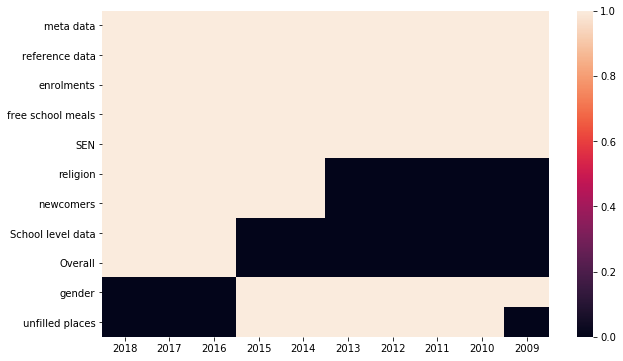

In [20]:
import seaborn as sns
f,ax = plt.subplots(figsize=graph_figsize)
sns.heatmap(df.T, ax=ax)

![](img/ahhfuck.webp)

![](img/2000.png)

## A few highlights from the hellscape
### Best thing about standards is how many there are to choose from...
 
![](img/reference_year.png)

### Sometimes understanding the data is more painful (and ugly) than expected
This was the only document that seemed to explain what 'supernumerary' actually means
![](img/comic_sans.png)

It means 'extra'...

### Using multiple tools simultanously can be problematic...
Excel on Mac helpfully puts down a lock-entry on open excel files which prevent it from being opened by other things. 

Pandas occasionally has unhelpful error messages in this regard

![](img/geethanks.png)

### Sometimes you have to give up on stuff because it's too dangerous an area to walk in to.

Special Educational Needs classification policy is >>100pg policy that appears to change every year.

I am not an expert on education policy so I'm not sticking my foot in that one without being sure I understand the implications.

It's your responsibility as a Data Science to be able to make that call, and know your limits.

### "Machine Readable"

![](img/machinereadable.jpg)

![](img/starman.png)

<img src="img/hashs.png" width="90%"/>

<img src="img/multirow.png" width="70%"/>

![](img/footer.png)

In [31]:
def join_n_strip_n_lower(l): return ' '.join(l).strip().lower()

def strip_n_lower(s): return s.strip().lower()

def unyearify(s): return int(s.replace('year ', ''))

def parse_reference_table(xls):
    """
    From an ExcelFile, clean up:
    * School Mgmt Type disaster
    * Inconsistent header depth
    * Multi-row header names
    * inconsistent headers (ref_key_map)
    * inconsistent col order
    * inconsistent caps/spacing (strip|lower)
    """
    cols= [
        'de ref',
        'school name',
        'school type',
        'address 1',
        'postcode',
        'urban_rural',
        'school management type',
        'district council',
        'parliamentary constituency',
        'town'
    ]
    
    categories = [
        'school type',
        'urban_rural',
        'school management type',
        'district council',
        'parliamentary constituency',
        'town'
    ]

    ref_key_map={
        'denino':'de ref',
        'urban/ rural': 'urban_rural',
        'schoolname': 'school name'
    }
    
    reference_value_rename = {
        'school management type':{
             'gmi':'integrated',
             'controlled integrated':'integrated',
             'roman catholic maintained':'rc maintained',
             'grant maintained integrated':'integrated',
             'voluntary - other managed':'voluntary',
             'voluntary - rc managed':'voluntary',
             'catholic maintained':'rc maintained'
        }
    }
    
    if 'reference data' in xls.sheet_names:
        df = pd.read_excel(xls, 'reference data', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[1:h_range].fillna('').apply(join_n_strip_n_lower, axis=0).values
            df.rename(columns=ref_key_map, inplace=True)
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df = df[cols]
            if hasattr(df['de ref'], 'str'):
                try:
                    df = df[df['de ref'].str.isdigit().fillna(True)].dropna(how='all', axis=0)
                except KeyError:
                    pass
            df['de ref'] = df['de ref'].astype(int)
            df.set_index('de ref', inplace=True)
            for c in df:
                 df[c]=df[c].str.lower().str.strip()            
            df.replace(reference_value_rename, inplace=True)
            for c in categories:
                df[c].fillna('NA', inplace=True)
                df[c] = df[c].astype('category')
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

def parse_enrolments_table(xls):
    """From an ExcelFile, clean up:
    * Inconsistent header depth
    * fucked up nans/nulls all over the place
    * inconsistent *footer* depth...
    * Set de ref as join index and drop pointless fields
    """

    if 'enrolments' in xls.sheet_names:
        df = pd.read_excel(xls, 'enrolments', header=None, skip_footer=5)
        h_range = 2 if isinstance(df.ix[3, 0], int) else 3
        try:
            df.columns = df.ix[3].fillna('').apply(strip_n_lower).values
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df.dropna(how='all', inplace=True, axis=0)
            if hasattr(df['de ref'], 'str'):
                try:
                    df = df[df['de ref'].str.isdigit().fillna(True)].dropna(how='all', axis=0)
                except KeyError:
                    pass
            df['de ref'] = df['de ref'].astype(int)
            df.drop('schoolname', axis=1, inplace=True)
            df.drop('total pupils', axis=1, inplace=True)
            df.set_index('de ref', inplace=True)
            df.rename(columns=unyearify, inplace=True)
            df = df.astype(float)
        except TypeError as e:
            print(e)
    else:
        df = None
    return df

def parse_fsm_table(xls):
    """From an ExcelFile, clean up:
    * Inconsistent header depth
    * fucked up nans/nulls all over the place
    * inconsistent *footer* depth...
    * Set de ref as join index and drop pointless fields
    """
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    strip_n_lower = lambda s: s.strip().lower()
    unyearify = lambda s: int(s.replace('year ',''))
    
    if 'free school meals' in xls.sheet_names:
        df = pd.read_excel(xls, 'free school meals', header=None, skip_footer=5)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[3].fillna('').apply(strip_n_lower).values
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df.dropna(how='all', inplace=True, axis=0)
            df['de ref'] = df['de ref'].astype(int)
            df.drop('schoolname',axis=1, inplace=True)
            df.drop('free school meals', axis=1, inplace=True)
            df.set_index('de ref', inplace=True)
            df.replace('#',pd.np.nan, inplace=True) # # = Undisclosed
            df.replace('*',2.0, inplace=True) # * == < 5
            df.replace('!',1, inplace=True) # ! avoid identification, so it's prob one or two
            
            df=df.astype(float)
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

def parse_available_table(xls):
    """From an ExcelFile, clean up:
    * Inconsistent header depth
    * fucked up nans/nulls all over the place
    * inconsistent *footer* depth...
    * Set de ref as join index and drop pointless fields
    * Totally different schemas between years
    * Inconsistent metric naming
    * non numerical data flags (*/!)
    """
    ref_key_map={
        'schoolname': 'school name',
        'total unfilled places': 'available places',
        'unfilled places': 'available places',
        'total approved enrolment number': 'approved enrolments'
    }
    
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    
    if 'School level data' in xls.sheet_names:
        df = pd.read_excel(xls, 'School level data', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
    elif 'unfilled places' in xls.sheet_names:
        df = pd.read_excel(xls, 'unfilled places', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
    else:
        df=None
        
    if df is not None:
        try:
            df.columns=df.ix[1:h_range].fillna('').apply(join_n_strip_n_lower, axis=0).values
            df.rename(columns=ref_key_map, inplace=True)
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df=df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
            df.dropna(how='all', axis=1, inplace=True)
            df.dropna(how='any', axis=0, inplace=True)
            if df.shape[1] == 6: # recent doesn't have fecking headers
                cols = list(df.columns)
                cols[0] = 'de ref'
                cols[1] = 'school name'
                df.columns=cols
            df.drop('school name', axis=1, inplace=True)
            df['de ref'] = df['de ref'].astype(int)
            df.set_index('de ref', inplace=True)
            df.replace('*',2.0, inplace=True) # * == < 5
            df.replace('!',1, inplace=True) # ! avoid identification, so it's prob one or two
            df.dropna(how='all', inplace=True, axis=1)
            df.astype(int, inplace=True)
            
        except TypeError as e:
            print(e)

    return df

In [32]:
re_dfs={}
av_dfs={}
en_dfs={}
fsm_dfs={}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_reference_table(xls)
            if df is not None:
                print(f'Got reference data for {year}')
                re_dfs[year]=df
            df = parse_enrolments_table(xls)
            if df is not None:
                print(f'Got enrolment data for {year}')
                en_dfs[year]=df
            df = parse_available_table(xls)
            if df is not None:
                print(f'Got available data for {year}')
                av_dfs[year]=df
            df = parse_fsm_table(xls)
            if df is not None:
                print(f'Got fsm data for {year}')
                fsm_dfs[year]=df
                
reference = pd.Panel(re_dfs).sort_index()
available = pd.Panel(av_dfs).sort_index()
enrolment = pd.Panel(en_dfs).sort_index()
fsm = pd.Panel(fsm_dfs).sort_index()

Got reference data for 2018
Got enrolment data for 2018
Got fsm data for 2018
Got available data for 2018
Got reference data for 2017
Got enrolment data for 2017
Got fsm data for 2017
Got available data for 2017
Got reference data for 2016
Got enrolment data for 2016
Got fsm data for 2016
Got available data for 2016
Got reference data for 2015
Got enrolment data for 2015
Got available data for 2015
Got fsm data for 2015
Got reference data for 2014
Got enrolment data for 2014
Got available data for 2014
Got fsm data for 2014
Got reference data for 2013
Got enrolment data for 2013
Got available data for 2013
Got fsm data for 2013
Got reference data for 2012
Got enrolment data for 2012
Got available data for 2012
Got fsm data for 2012
Got reference data for 2011
Got enrolment data for 2011
Got available data for 2011
Got fsm data for 2011
Got reference data for 2010
Got enrolment data for 2010
Got available data for 2010
Got fsm data for 2010
Got reference data for 2009
Got enrolment data

# Bring it all together
Panels are 3D Dataframes, i.e. [Year x School x Metric]

* Reference: School name, address, denomination, type, etc.
* Available: Allocated places information
* Enrolment: Actual student numbers
* FSM: Free School Meals: Laziest possible deprivation measure, probably doesn't need to be a panel

# Show me the data

## Line graphs & boxplots & pie charts, Oh My

![](img/ohmy.gif)

In [33]:
enrolment.sum()

2009     2010     2011     2012     2013     2014     2015     2016  \
8   23116.0  23113.0  21332.0  21322.0  21418.0  21367.0  21792.0  22571.0   
9   23859.0  23403.0  22479.0  21928.0  21425.0  21481.0  21422.0  22284.0   
10  22954.0  24155.0  22809.0  23101.0  21971.0  21527.0  21443.0  21864.0   
11  23521.0  23277.0  23615.0  23524.0  23299.0  22092.0  21601.0  22118.0   
12  23808.0  23656.0  22520.0  24027.0  23353.0  23166.0  21864.0  22091.0   
13  14912.0  15652.0  15073.0  15892.0  16567.0  16208.0  15912.0  15667.0   
14  12607.0  13097.0  13038.0  13482.0  13554.0  14174.0  13922.0  13818.0   
15    100.0    154.0    143.0    196.0    201.0    275.0    365.0      NaN   

       2017     2018  
8   22817.0  23866.0  
9   22650.0  22906.0  
10  22381.0  22776.0  
11  22102.0  22631.0  
12  22099.0  21988.0  
13  15347.0  15271.0  
14  13149.0  12801.0  
15      NaN      NaN

In [153]:
enrolment.sum().sum().iplot()

In [154]:
enrolment.sum().iplot(kind='bar')

In [155]:
enrolment.sum().T.iplot(kind='bar',barmode='stack')

In [156]:
# What is wrong with this "sum" table?
enrolment.sum(axis=2).head()

2009   2010   2011   2012   2013   2014   2015   2016   2017    2018
de ref                                                                        
1210014  672.0  688.0  703.0  708.0  704.0  697.0  704.0  696.0  691.0   699.0
1210015  647.0  650.0  649.0  666.0  709.0  737.0  744.0  728.0  740.0   765.0
1210021  963.0  929.0  899.0  930.0  916.0  884.0  910.0  954.0  946.0   983.0
1210022  907.0  932.0  913.0  930.0  943.0  969.0  968.0  991.0  997.0  1003.0
1210266  297.0  290.0  264.0  247.0   88.0    NaN    NaN    NaN    NaN     NaN

### Skippable aside: Danger Zone
![](img/danger.gif)

__When is a zero not nothing?__

In [38]:
[10]+[np.nan]*10

[10, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [39]:
sum([10]+[np.nan]*10)

nan

In [40]:
pd.Series([10]+[np.nan]*10).sum()

10.0

In [41]:
pd.Series([10]+[np.nan]*10).mean()

10.0

In [42]:
pd.Series([np.nan]*10).sum()

nan

In [43]:
pd.Series([10]+[0.0]*10).mean()

0.90909090909090906

In [44]:
# These 0's are actually sum([np.nan])
# The school was closed in 2014
enrolment.sum(axis=2).head()

2009   2010   2011   2012   2013   2014   2015   2016   2017    2018
de ref                                                                        
1210014  672.0  688.0  703.0  708.0  704.0  697.0  704.0  696.0  691.0   699.0
1210015  647.0  650.0  649.0  666.0  709.0  737.0  744.0  728.0  740.0   765.0
1210021  963.0  929.0  899.0  930.0  916.0  884.0  910.0  954.0  946.0   983.0
1210022  907.0  932.0  913.0  930.0  943.0  969.0  968.0  991.0  997.0  1003.0
1210266  297.0  290.0  264.0  247.0   88.0    NaN    NaN    NaN    NaN     NaN

In [45]:
reference[2013].loc[1210266]

school name                   orangefield high school
school type                                 secondary
address 1                            cameronian drive
postcode                                       bt56aw
urban_rural                                     urban
school management type                     controlled
district council                              belfast
parliamentary constituency               belfast east
town                                          belfast
Name: 1210266, dtype: object

In [46]:
reference[2014].loc[1210266]

school name                   NaN
school type                   NaN
address 1                     NaN
postcode                      NaN
urban_rural                   NaN
school management type        NaN
district council              NaN
parliamentary constituency    NaN
town                          NaN
Name: 1210266, dtype: object

In [47]:
# It *should* look like this
enrolment.sum(axis=2).head().replace(0.0, np.nan)

2009   2010   2011   2012   2013   2014   2015   2016   2017    2018
de ref                                                                        
1210014  672.0  688.0  703.0  708.0  704.0  697.0  704.0  696.0  691.0   699.0
1210015  647.0  650.0  649.0  666.0  709.0  737.0  744.0  728.0  740.0   765.0
1210021  963.0  929.0  899.0  930.0  916.0  884.0  910.0  954.0  946.0   983.0
1210022  907.0  932.0  913.0  930.0  943.0  969.0  968.0  991.0  997.0  1003.0
1210266  297.0  290.0  264.0  247.0   88.0    NaN    NaN    NaN    NaN     NaN

## AUDIENCE PARTICIPATION

Which of the below is the correct answer to:
    "What is the average number of pupils per school in Northern Ireland from 2009 to 2017?"

In [48]:
#A Sum of years, swap 0 for nan, mean over schools, mean over classes
enrolment.sum(axis=1).replace(0.0, np.nan).mean(axis=1).mean()

17750.944642857146

In [49]:
#B Sum over classes, mean over schools, swap 0 for nan, mean over years
enrolment.sum(axis=2).mean().replace(0.0,np.nan).mean()

688.20967740978392

In [50]:
#C Sum over classes, swap 0.0 for nan, mean over schools, mean over years
enrolment.sum(axis=2).replace(0.0, np.nan).mean().mean()

688.20967740978392

## C: Sum over classes, swap 0.0 for nan, mean over schools, mean over years!

But why not B, it's doing the same thing right?

In [51]:
enrolment.sum(axis=2).head()

2009   2010   2011   2012   2013   2014   2015   2016   2017    2018
de ref                                                                        
1210014  672.0  688.0  703.0  708.0  704.0  697.0  704.0  696.0  691.0   699.0
1210015  647.0  650.0  649.0  666.0  709.0  737.0  744.0  728.0  740.0   765.0
1210021  963.0  929.0  899.0  930.0  916.0  884.0  910.0  954.0  946.0   983.0
1210022  907.0  932.0  913.0  930.0  943.0  969.0  968.0  991.0  997.0  1003.0
1210266  297.0  290.0  264.0  247.0   88.0    NaN    NaN    NaN    NaN     NaN

In [52]:
enrolment.sum(axis=2).head().mean().to_frame().T

2009   2010   2011   2012   2013    2014   2015    2016   2017   2018
0  697.2  697.8  685.6  696.2  672.0  821.75  831.5  842.25  843.5  862.5

In [53]:
enrolment.sum(axis=2).replace(0.0,np.nan).head()

2009   2010   2011   2012   2013   2014   2015   2016   2017    2018
de ref                                                                        
1210014  672.0  688.0  703.0  708.0  704.0  697.0  704.0  696.0  691.0   699.0
1210015  647.0  650.0  649.0  666.0  709.0  737.0  744.0  728.0  740.0   765.0
1210021  963.0  929.0  899.0  930.0  916.0  884.0  910.0  954.0  946.0   983.0
1210022  907.0  932.0  913.0  930.0  943.0  969.0  968.0  991.0  997.0  1003.0
1210266  297.0  290.0  264.0  247.0   88.0    NaN    NaN    NaN    NaN     NaN

In [54]:
enrolment.sum(axis=2).replace(0.0,np.nan).mean().to_frame().T

2009        2010        2011        2012        2013        2014  \
0  670.726852  678.273148  674.684211  673.577465  681.673077  681.019417   

      2015        2016        2017        2018  
0  691.605  698.572139  706.256281  725.709184

It's your responsibility as a Data Scientist to understand what questions your algorithms are *really* answering, and make sure that the people who may be answering those question are *crystal clear* about what your data means.

Data Science is as much about comprehension and communication as it is about statistics and programming.

### Return of regular schedule - What happened to average cohort sizes in 2015?

In [158]:
enrolment.mean(axis=2).mean().iplot(title='Annual Average Cohort (school,class,year)')

In [159]:
enrolment.mean(axis=2).T.iplot(title='Annual Average Cohort (school,class,year) per school', legend=False)

In [59]:
annual_school_enrolment = enrolment.sum(axis=2).T
annual_school_enrolment.head()

de ref  1210014  1210015  1210021  1210022  1210266  1230026  1230053  \
2009      672.0    647.0    963.0    907.0    297.0    784.0   1547.0   
2010      688.0    650.0    929.0    932.0    290.0    785.0   1530.0   
2011      703.0    649.0    899.0    913.0    264.0    764.0   1530.0   
2012      708.0    666.0    930.0    930.0    247.0    765.0   1521.0   
2013      704.0    709.0    916.0    943.0     88.0    705.0   1516.0   

de ref  1230089  1230104  1230130   ...     5420059  5420060  5420062  \
2009      691.0    438.0    468.0   ...       880.0    861.0    919.0   
2010      687.0    429.0    440.0   ...       887.0    861.0    940.0   
2011      690.0    384.0    406.0   ...       894.0    864.0    942.0   
2012      692.0    367.0    388.0   ...       907.0    861.0    920.0   
2013      684.0    423.0    352.0   ...       900.0    858.0    900.0   

de ref  5420073  5420076  5420260  5420263  5420268  5420304  5420314  
2009      527.0    836.0    646.0      NaN      NaN      NaN      NaN  
2010      555.0    846.0    658.0    682.0    803.0      NaN      NaN  
2011      579.0    845.0    665.0      NaN      NaN      NaN      NaN  
2012      604.0    849.0    652.0    706.0      NaN      NaN      NaN  
2013      635.0    855.0    653.0    712.0      NaN      NaN      NaN  

[5 rows x 234 columns]

In [160]:
name_lookup = reference.minor_xs('school name').T.describe().ix['top']
annual_school_enrolment.rename(columns=name_lookup).iplot(legend=False)

In [161]:
annual_school_enrolment.index.min()

2009

In [66]:
first = annual_school_enrolment.replace(0.0,np.nan).\
    apply(pd.Series.first_valid_index).\
    replace(annual_school_enrolment.index.min(),np.nan)
last = annual_school_enrolment.replace(0.0,np.nan).\
    apply(pd.Series.last_valid_index).\
    replace(annual_school_enrolment.index.max(),np.nan)
first.dropna()

de ref
1230321    2017.0
1410315    2014.0
2210312    2013.0
2230322    2017.0
2240319    2015.0
2410311    2011.0
2420320    2016.0
3210313    2015.0
3210323    2018.0
3230310    2010.0
3230318    2018.0
3420317    2015.0
4210316    2015.0
5230321    2017.0
5420263    2010.0
5420268    2010.0
5420304    2016.0
5420314    2016.0
dtype: float64

In [67]:
close_vec=pd.DataFrame({
    'opened':first.groupby(first).size(),
    'closed':last.groupby(last).size()}
)
close_vec

closed  opened
2009.0     3.0     NaN
2010.0     2.0     3.0
2011.0     1.0     1.0
2012.0     6.0     NaN
2013.0     3.0     1.0
2014.0    11.0     1.0
2015.0     2.0     4.0
2016.0     5.0     3.0
2017.0     5.0     3.0
2018.0     NaN     2.0

In [162]:
close_vec.cumsum().fillna(method='ffill').iplot(title="Cumulative number of schools opened\closed since 2009")

 ### Skippable Aside: Slicing Panels

In [69]:
up_to_ks3=enrolment.minor_axis<=10
up_to_ks3

array([ True,  True,  True, False, False, False, False, False], dtype=bool)

In [70]:
enrolment[:,:,up_to_ks3].sum()

2009     2010     2011     2012     2013     2014     2015     2016  \
8   23116.0  23113.0  21332.0  21322.0  21418.0  21367.0  21792.0  22571.0   
9   23859.0  23403.0  22479.0  21928.0  21425.0  21481.0  21422.0  22284.0   
10  22954.0  24155.0  22809.0  23101.0  21971.0  21527.0  21443.0  21864.0   

       2017     2018  
8   22817.0  23866.0  
9   22650.0  22906.0  
10  22381.0  22776.0

In [71]:
cowtown=reference.major_axis[(reference.minor_xs('town')=='ballymoney').any(axis=1)]
cowtown

Int64Index([3210133, 3230075, 3420012], dtype='int64', name='de ref')

In [72]:
enrolment.sum(axis=2).loc[cowtown].sum()

2009    1722.0
2010    1728.0
2011    1736.0
2012    1766.0
2013    1757.0
2014    1762.0
2015    1746.0
2016    1743.0
2017    1691.0
2018    1749.0
dtype: float64

## Mapping
* Maps are *hard* in NI
* No Open Data mapping between Postcode -> Boundary
* Also doesn't help that ESRI's API's have been broken recently....


However... we do get towns and administrative boundaries... from something called the "Gazetter"

In [73]:
if not Path('data/gztr').exists():
    gztr_json=requests.get("http://osni-spatial-ni.opendata.arcgis.com/datasets/117e5c3d0f0b41208d1caec1ddbd1330_1.geojson").json()
    gztr = gp.GeoDataFrame.from_features(gztr_json).set_index('OBJECTID')
    gztr['PLACENAME'] = gztr['PLACENAME'].str.lower()
    gztr.to_file('data/gztr')
gztr = gp.read_file('data/gztr')
gztr.head()

PLACENAME       X       Y                                      geometry
0      acton  305600  341200  POINT (-6.378357832885347 54.30866006639004)
1  aghadowey  285900  420900  POINT (-6.657508075752721 55.02810109314576)
2    aghalee  312300  365000  POINT (-6.266475501088042 54.52093954801902)
3     agivey  289900  422900  POINT (-6.594350521151068 55.04535455095262)
4   ahoghill  305000  401700   POINT (-6.365968303625221 54.8520449124516)

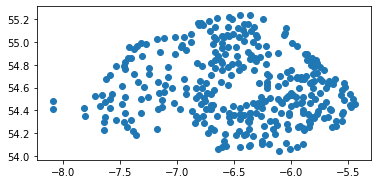

In [74]:
gztr.plot()

### And we have a base map...

In [75]:
base_map_zip="http://osni-spatial-ni.opendata.arcgis.com/datasets/d9dfdaf77847401e81efc9471dcd09e1_0.zip"
base_map_shp = "OSNI_Open_Data_Largescale_Boundaries__NI_Outline.shp"

if not Path('data/'+base_map_shp).exists():
    urllib.request.urlretrieve(base_map_zip, 'data/_tmp.zip')
    with zipfile.ZipFile('data/_tmp.zip') as z:
        z.extractall('data/')
    Path('data/_tmp.zip').unlink()
    
base_map=gp.GeoDataFrame.from_file('data/'+base_map_shp)

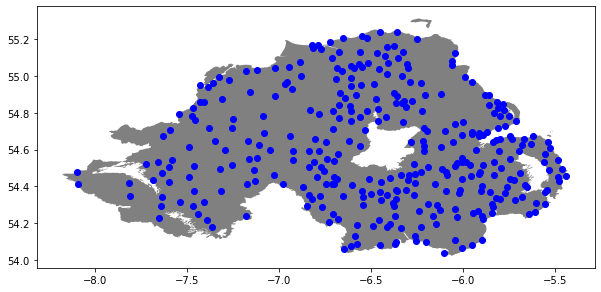

In [77]:
f,ax = plt.subplots(figsize=graph_figsize)
base_map.plot(ax=ax, color='gray')
gztr.plot(ax=ax, color='b')

In [78]:
from scipy.stats import mode
school_towns = reference.minor_xs('town').mode(axis=1)[0].value_counts()
school_towns

belfast          44
enniskillen      16
londonderry      14
newry            14
ballymena        12
coleraine         9
omagh             8
dungannon         8
craigavon         7
newtownabbey      7
armagh            7
magherafelt       6
lisburn           6
newtownards       5
downpatrick       5
carrickfergus     5
portadown         4
banbridge         4
strabane          4
bangor            4
ballynahinch      3
limavady          3
ballymoney        3
larne             3
ballycastle       2
antrim            2
lurgan            2
holywood          2
cookstown         2
ballyclare        2
castlederg        2
belleek           1
portstewart       1
fivemiletown      1
portglenone       1
dromore           1
aughnacloy        1
newcastle         1
keady             1
castlewellan      1
randalstown       1
kilkeel           1
maghera           1
crumlin           1
dungiven          1
saintfield        1
carrowdore        1
tandragee         1
bushmills         1
crossgar          1


In [79]:
school_towns_gp = gztr[gztr['PLACENAME'].isin(school_towns.keys())].set_index('PLACENAME')
school_towns_gp.head()

X       Y                                      geometry
PLACENAME                                                                
antrim       315300  387000  POINT (-6.211523867240925 54.71779842118471)
armagh       287600  345500  POINT (-6.653546587557944 54.35067926584342)
aughnacloy   266500  352300  POINT (-6.976457676904118 54.41494128620327)
ballycastle  311500  440700  POINT (-6.249617934408202 55.20079525328168)
ballyclare   328700  391200  POINT (-6.001860148320316 54.75225829672591)

In [80]:
school_towns_gp['school_count'] = school_towns.astype(float)
school_towns_gp.head()

X       Y                                      geometry  \
PLACENAME                                                                   
antrim       315300  387000  POINT (-6.211523867240925 54.71779842118471)   
armagh       287600  345500  POINT (-6.653546587557944 54.35067926584342)   
aughnacloy   266500  352300  POINT (-6.976457676904118 54.41494128620327)   
ballycastle  311500  440700  POINT (-6.249617934408202 55.20079525328168)   
ballyclare   328700  391200  POINT (-6.001860148320316 54.75225829672591)   

             school_count  
PLACENAME                  
antrim                2.0  
armagh                7.0  
aughnacloy            1.0  
ballycastle           2.0  
ballyclare            2.0

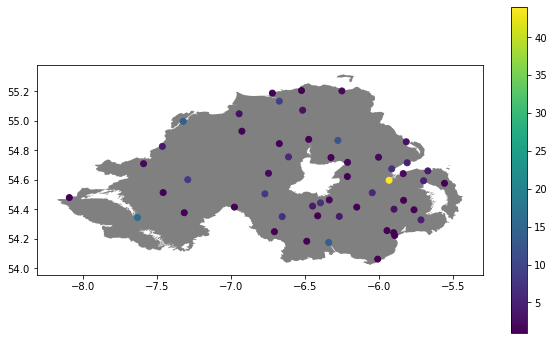

In [81]:
f,ax = plt.subplots(figsize=graph_figsize)
base_map.plot(ax=ax, color='gray')
school_towns_gp.plot(ax=ax, column='school_count', legend=True)

### Points aren't really very good for seeing trends though...
Need some regions

In [82]:
cons_map_zip="http://osni-spatial-ni.opendata.arcgis.com/datasets/563dc2ec3d9943428e3fe68966d40deb_3.zip"
cons_map_shp = "OSNI_Open_Data_Largescale_Boundaries__Parliamentary_Constituencies_2008.shp"
if not Path('data/'+cons_map_shp).exists():
    urllib.request.urlretrieve(cons_map_zip, 'data/_tmp.zip')
    with zipfile.ZipFile('data/_tmp.zip') as z:
        z.extractall('data/')
    Path('data/_tmp.zip').unlink()
    
cons_map=gp.GeoDataFrame.from_file('data/'+cons_map_shp)
cons_map.rename(columns={'PC_NAME':'constituency'}, inplace=True)
cons_map.drop(['OBJECTID','PC_ID'], axis=1, inplace=True)
cons_map['constituency'] = cons_map['constituency'].str.lower().str.strip()
cons_map.set_index('constituency', inplace=True)
cons_map.head()

Area_sqkm                                           geometry
constituency                                                                
north down     115.440659  (POLYGON ((-5.535202262588358 54.6429094127538...
upper bann     479.692420  POLYGON ((-6.272362541809057 54.53315266491968...
east antrim    593.040484  (POLYGON ((-5.821518715277645 54.8754462316150...
north antrim  1386.235791  (POLYGON ((-6.429871651099131 55.2386720274860...
south down    1249.820808  (POLYGON ((-6.079447038790904 54.0473674415929...

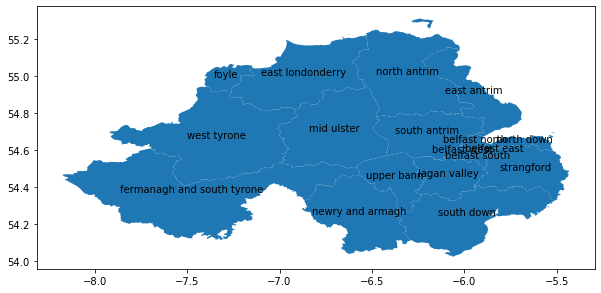

In [83]:
f,ax = plt.subplots(figsize=graph_figsize)
cons_map.plot(ax=ax)
cons_map.apply(lambda x: ax.annotate(x.name, 
                                     xy=x.geometry.centroid.coords[0], 
                                     ha='center'),
               axis=1); 

In [84]:
reference.minor_xs('parliamentary constituency').head()

2009           2010           2011           2012  \
de ref                                                                
1210014   belfast east   belfast east   belfast east   belfast east   
1210015   belfast east   belfast east   belfast east   belfast east   
1210021  belfast north  belfast north  belfast north  belfast north   
1210022  belfast north  belfast north  belfast north  belfast north   
1210266   belfast east   belfast east   belfast east   belfast east   

                  2013           2014           2015           2016  \
de ref                                                                
1210014   belfast east   belfast east   belfast east   belfast east   
1210015   belfast east   belfast east   belfast east   belfast east   
1210021  belfast north  belfast north  belfast north  belfast north   
1210022  belfast north  belfast north  belfast north  belfast north   
1210266   belfast east            NaN            NaN            NaN   

                  2017           2018  
de ref                                 
1210014   belfast east   belfast east  
1210015   belfast east   belfast east  
1210021  belfast north  belfast north  
1210022  belfast north  belfast north  
1210266            NaN            NaN

In [85]:
cons = set(reference.minor_xs('parliamentary constituency').values.ravel('k'))

en_df= pd.DataFrame.from_dict({
    con:
    enrolment[:,reference.major_axis[(reference.minor_xs('parliamentary constituency')==con).any(axis=1)],:].sum().sum()
    for con in cons
}).T.drop(np.nan)
av_df= pd.DataFrame.from_dict({
    con:
    available[:,reference.major_axis[(reference.minor_xs('parliamentary constituency')==con).any(axis=1)],'available places'].sum()
    for con in cons
}).T.drop(np.nan)

cons_stats = gp.GeoDataFrame(geometry=cons_map.geometry)
for c in av_df:
    cons_stats[f"av_{c}"] = av_df[c]
    cons_stats[f"av_{c}_rat"] = (av_df[c]/en_df[c])
for c in en_df:
    cons_stats[f"en_{c}"] = en_df[c]
    cons_stats[f"en_{c}_pk"] = en_df[c]/cons_map["Area_sqkm"]

In [86]:
cons_stats.head()

geometry  av_2010  \
constituency                                                               
north down    (POLYGON ((-5.535202262588358 54.6429094127538...     76.0   
upper bann    POLYGON ((-6.272362541809057 54.53315266491968...   1837.0   
east antrim   (POLYGON ((-5.821518715277645 54.8754462316150...    664.0   
north antrim  (POLYGON ((-6.429871651099131 55.2386720274860...    994.0   
south down    (POLYGON ((-6.079447038790904 54.0473674415929...   1378.0   

              av_2010_rat  av_2011  av_2011_rat  av_2012  av_2012_rat  \
constituency                                                            
north down       0.013831     70.0     0.012572     83.0     0.014877   
upper bann       0.180772   2129.0     0.211967   2308.0     0.232967   
east antrim      0.101158    739.0     0.113762    855.0     0.133406   
north antrim     0.105163   1094.0     0.116321   1217.0     0.129097   
south down       0.120803   1577.0     0.140841   1693.0     0.151989   

              av_2013  av_2013_rat  av_2014     ...      en_2014  en_2014_pk  \
constituency                                    ...                            
north down       49.0     0.008807     67.0     ...       5602.0   48.527096   
upper bann     2457.0     0.252466   2624.0     ...       9589.0   19.989893   
east antrim     999.0     0.160844   1085.0     ...       6141.0   10.355111   
north antrim   1263.0     0.135399   1003.0     ...       9313.0    6.718193   
south down     1857.0     0.169095   2037.0     ...      10782.0    8.626837   

              en_2015  en_2015_pk  en_2016  en_2016_pk  en_2017  en_2017_pk  \
constituency                                                                  
north down     5675.0   49.159456   5703.0   49.402005   5759.0   49.887102   
upper bann     8147.0   16.983800   9602.0   20.016993   9808.0   20.446435   
east antrim    6217.0   10.483264   6245.0   10.530478   6293.0   10.611417   
north antrim   9163.0    6.609987   9140.0    6.593395   9126.0    6.583296   
south down    10684.0    8.548425  10519.0    8.416407  10504.0    8.404405   

              en_2018  en_2018_pk  
constituency                       
north down     5940.0   51.455008  
upper bann    10203.0   21.269880  
east antrim    6364.0   10.731139  
north antrim   9148.0    6.599166  
south down    10724.0    8.580430  

[5 rows x 39 columns]

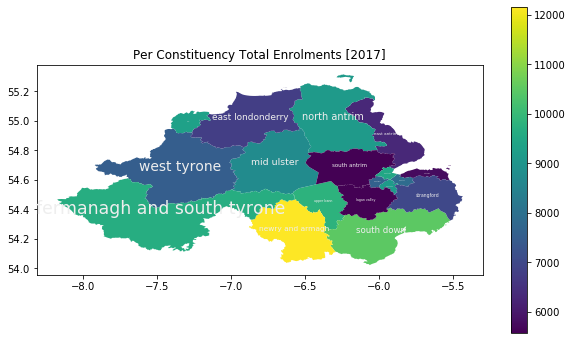

In [87]:
f,ax = plt.subplots(figsize=graph_figsize)
ax.set_title("Per Constituency Total Enrolments [2017]")
cons_stats.plot(column='en_2017',ax=ax, legend=True)
cons_stats.apply(lambda x: 
                 ax.annotate(x.name, 
                             xy=x.geometry.centroid.coords[0], 
                             ha='center', 
                             color='#eeeeee',
                             fontsize=50*x.geometry.area
                            ),
                 axis=1);

In [88]:
def annotate_cons(x, ax=ax):
    ax.annotate(x.name, 
                 xy=x.geometry.centroid.coords[0], 
                 ha='center', 
                 color='#eeeeee',
                 fontsize=50*x.geometry.area
                )

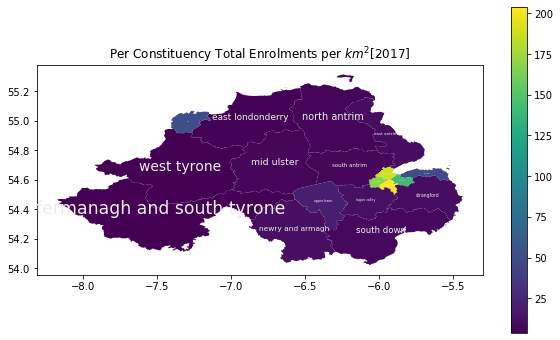

In [89]:
f,ax = plt.subplots(figsize=graph_figsize)
ax.set_title("Per Constituency Total Enrolments per $km^2$[2017]")
cons_stats.plot(column='en_2017_pk',ax=ax, legend=True)
cons_stats.apply(annotate_cons, ax=ax, axis=1);

In [90]:
cons_stats["en_2017_pk"].sort_values(ascending=False)

constituency
belfast south                 204.103113
belfast north                 188.638143
belfast west                  168.999917
belfast east                  142.627717
foyle                          50.799751
north down                     49.887102
upper bann                     20.446435
lagan valley                   11.912162
newry and armagh               11.243427
strangford                     10.671039
east antrim                    10.611417
south down                      8.404405
south antrim                    7.097824
north antrim                    6.583296
mid ulster                      6.462817
east londonderry                5.307115
fermanagh and south tyrone      3.857524
west tyrone                     3.768899
Name: en_2017_pk, dtype: float64

## But what does it all mean

Gather data from other sources to put things in context; 

How many people are in each region?

![](img/pop_cons.png)

In [102]:
if not Path('data/cons_pop.csv').exists():
    for dataset in odni.action.package_show(id='population-estimates-for-northern-ireland')['resources']:
        if dataset['name'] == "Parliamentary Constituencies by single year of age and gender (mid-2001 to mid-2018)":
            cons_pop = pd.read_csv(dataset['url'])
            cons_pop.to_csv("data/cons_pop.csv", index=False)
    cons_pop.head()

cons_pop = pd.read_csv('data/cons_pop.csv')
cons_pop['Mid_Year_Ending'] = cons_pop.Mid_Year_Ending.astype(int)
cons_pop['Population_Estimate'] = cons_pop.Population_Estimate.astype(float)
cons_pop['Age'] = cons_pop.Age.astype(int)
cons_pop.rename(columns={'Geo_Name':'constituency'}, inplace=True)
cons_pop['constituency']= cons_pop.constituency.str.strip().str.lower()
cons_pop.head()

constituency   Geo_Code  Mid_Year_Ending       Gender  Age  \
0  belfast east  N06000001             2001  All persons    0   
1  belfast east  N06000001             2001  All persons    1   
2  belfast east  N06000001             2001  All persons    2   
3  belfast east  N06000001             2001  All persons    3   
4  belfast east  N06000001             2001  All persons    4   

   Population_Estimate  
0                827.0  
1               1045.0  
2               1159.0  
3               1032.0  
4               1106.0

In [103]:
cons_pop[(cons_pop.Gender == 'All persons') & (cons_pop.Mid_Year_Ending == 2018)].head()

constituency   Geo_Code  Mid_Year_Ending       Gender  Age  \
4641  belfast east  N06000001             2018  All persons    0   
4642  belfast east  N06000001             2018  All persons    1   
4643  belfast east  N06000001             2018  All persons    2   
4644  belfast east  N06000001             2018  All persons    3   
4645  belfast east  N06000001             2018  All persons    4   

      Population_Estimate  
4641               1176.0  
4642               1172.0  
4643               1164.0  
4644               1168.0  
4645               1214.0

### What's the distribution of ages in NI?

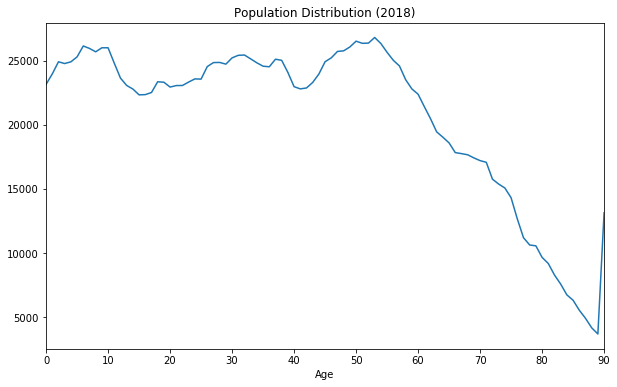

In [104]:
f,ax = plt.subplots(figsize=graph_figsize)
ax.set_title('Population Distribution (2018)')
cons_pop[(cons_pop.Gender == 'All persons') & (cons_pop.Mid_Year_Ending == 2018)]\
.groupby('Age')['Population_Estimate'].sum().plot.line(ax=ax)


### Constituency breakdown

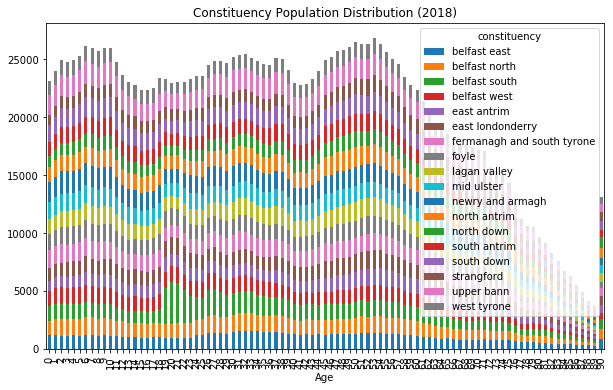

In [105]:
f,ax = plt.subplots(figsize=graph_figsize)
ax.set_title('Constituency Population Distribution (2018)')
cons_pop[(cons_pop.Gender == 'All persons') & (cons_pop.Mid_Year_Ending == 2018)]\
.groupby(['Age','constituency'])['Population_Estimate'].sum().unstack().plot.bar(stacked=True, ax=ax)

### That's not a great way of summarising age distributions....

[22, 45, 67]

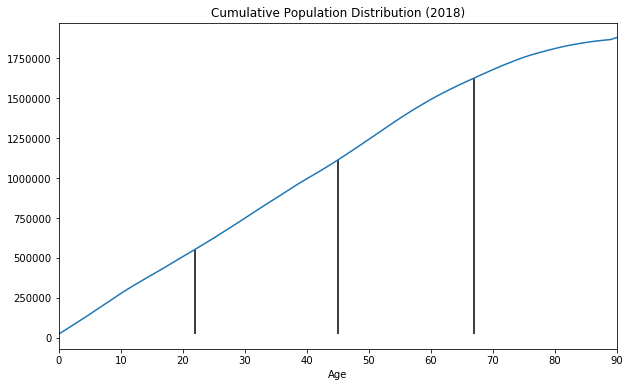

In [106]:
def idxquantile(s, q=0.5, *args, **kwargs):
    qv = s.quantile(q, *args, **kwargs)
    return (s.sort_values()[::-1] <= qv).idxmax()

f,ax = plt.subplots(figsize=graph_figsize)
ax.set_title('Cumulative Population Distribution (2018)')
pop_cumsum = cons_pop[(cons_pop.Gender == 'All persons') & (cons_pop.Mid_Year_Ending == 2018)]\
    .groupby('Age')['Population_Estimate'].sum().cumsum()
pop_cumsum.plot(ax=ax)
age_quartiles = [idxquantile(pop_cumsum, q) for q in [0.25,0.5,0.75]]
ax.vlines(age_quartiles, ymin=pop_cumsum.min(), ymax = pop_cumsum[age_quartiles])
age_quartiles

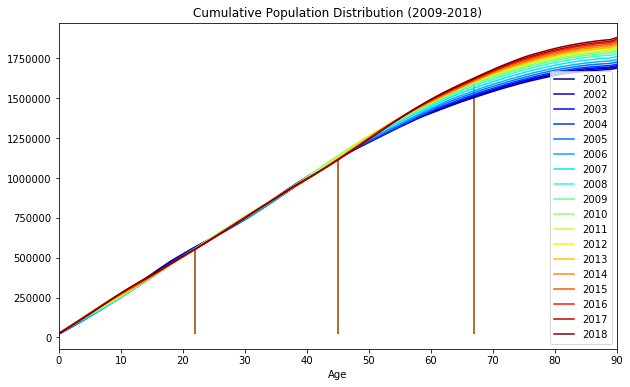

In [107]:
f,ax = plt.subplots(figsize=graph_figsize)
ax.set_title('Cumulative Population Distribution (2009-2018)')
yrs=sorted(cons_pop.Mid_Year_Ending.unique())
colors = plt.cm.jet(np.linspace(0,1,len(yrs)))
for yr,c in zip(yrs,colors):
    pop_cumsum = cons_pop[(cons_pop.Gender == 'All persons') \
                          & (cons_pop.Mid_Year_Ending == yr)]\
        .groupby('Age')['Population_Estimate'].sum().cumsum()
    pop_cumsum.plot(ax=ax, label=yr, c=c)
    age_quartiles = [idxquantile(pop_cumsum, q) for q in [0.25,0.5,0.75]]
    ax.vlines(age_quartiles, ymin=pop_cumsum.min(), ymax = pop_cumsum[age_quartiles],color=c,alpha=0.2)
ax.legend()

In [108]:
def constituency_age_profile(constituency=None):
    # I have a hunch we might was to do this
    # with lists....
    if constituency is None:
        constituency = cons_pop.constituency.unique()
        label = f"Population profile for NI"
    elif not isinstance(constituency, list):
        label = f"Population profile for {constituency}"
        constituency = [constituency]
    else: 
        label = f"Population profile for {constituency}"
    f,ax = plt.subplots(figsize=graph_figsize)
    yrs=sorted(cons_pop.Mid_Year_Ending.unique())
    colors = plt.cm.jet(np.linspace(0,1,len(yrs)))
    for yr,c in zip(yrs,colors):
        pop_cumsum = cons_pop[(cons_pop.Gender == 'All persons') \
                              & (cons_pop.constituency.isin(constituency))\
                              & (cons_pop.Mid_Year_Ending == yr)]\
            .groupby('Age')['Population_Estimate'].sum().cumsum()
        pop_cumsum.plot(ax=ax, label=yr, c=c)
        age_quartiles = [idxquantile(pop_cumsum, q) for q in [0.25,0.5,0.75]]
        ax.vlines(age_quartiles, ymin=pop_cumsum.min(), ymax = pop_cumsum[age_quartiles],color=c,alpha=0.2)
        for i,age in enumerate(age_quartiles):
            ax.annotate(f"<={age}", xy=(age, i))
    ax.legend()
    ax.set_title(label)


### South Belfast: Kinky Constituency

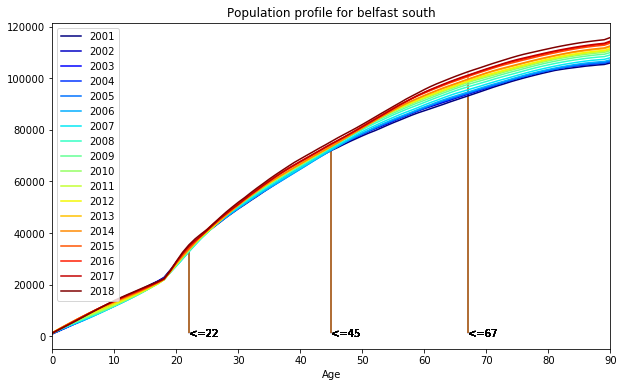

In [109]:
constituency_age_profile('belfast south')

### Newry and Armagh: Middle Age Mourneing

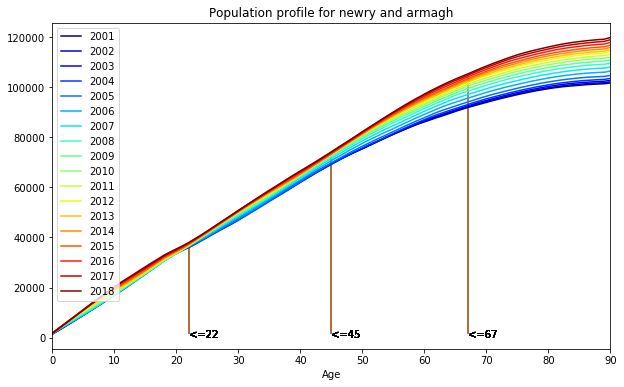

In [110]:
constituency_age_profile('newry and armagh')

### Foyled Again: Cross-generational Brain Drain

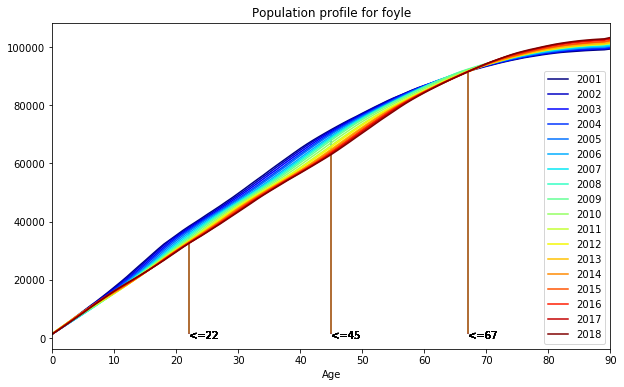

In [111]:
constituency_age_profile('foyle')

### North Antrim: 40 is the new 30

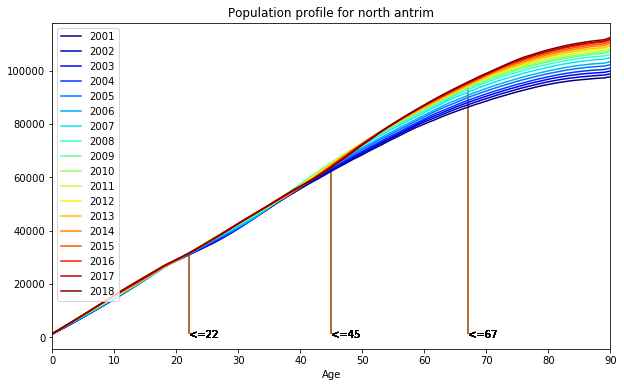

In [112]:
constituency_age_profile('north antrim')

### Growing Up in the (Lagan) Valley

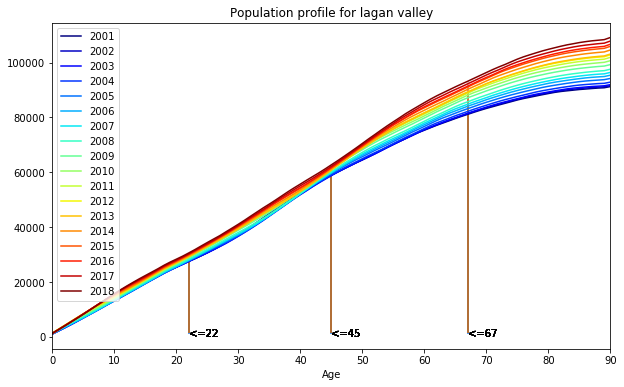

In [113]:
constituency_age_profile('lagan valley')

### Fast times at Belfast Unis/Colleges

In [163]:
df = cons_pop[(cons_pop.Gender == 'All persons') \
                      & (cons_pop.Mid_Year_Ending == 2018)]\
.groupby(['Age','constituency'])['Population_Estimate'].sum().unstack()
df.iplot()

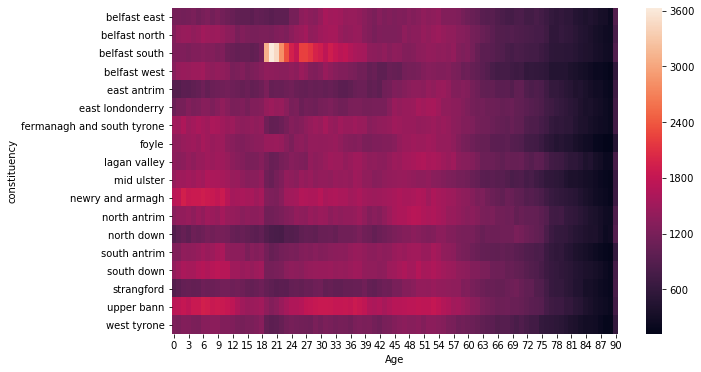

In [115]:
f,ax = plt.subplots(figsize=graph_figsize)
sns.heatmap(df.T, ax=ax)

In [164]:
def colnorm(df):
    return (df-df.min())/(df.max()-df.min())
colnorm(df).iplot()

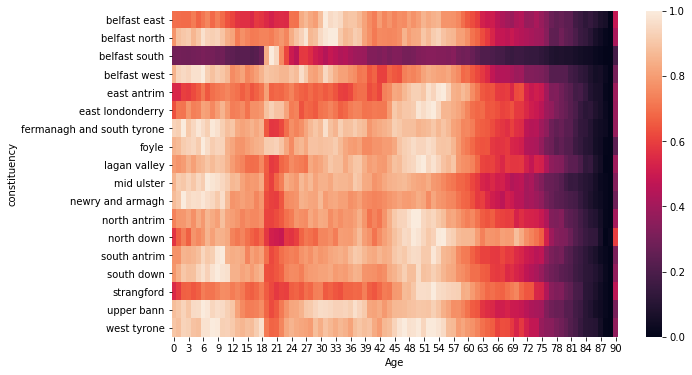

In [117]:
f,ax = plt.subplots(figsize=graph_figsize)
sns.heatmap(colnorm(df).T, ax=ax)

In [118]:
def year_age_profile(yr=2016):
    constituencies = list(cons_pop.groupby("constituency")['Population_Estimate'].sum().sort_values(ascending=True).keys())
    label = f"Population profile for NI in {yr}"
    f,ax = plt.subplots(figsize=graph_figsize)
    colors = plt.cm.jet(np.linspace(0,1,len(constituencies)))
    for constituency,c in zip(constituencies,colors):
        pop_cumsum = cons_pop[(cons_pop.Gender == 'All persons') \
                              & (cons_pop.constituency==constituency)\
                              & (cons_pop.Mid_Year_Ending == yr)]\
            .groupby('Age')['Population_Estimate'].sum().cumsum()
        pop_cumsum.plot(ax=ax, label=constituency, c=c)
        age_quartiles = [idxquantile(pop_cumsum, q) for q in [0.25,0.5,0.75]]
        ax.vlines(age_quartiles, ymin=pop_cumsum.min(), ymax = pop_cumsum[age_quartiles],color=c,alpha=0.2)
    ax.legend()
    ax.set_title(label)

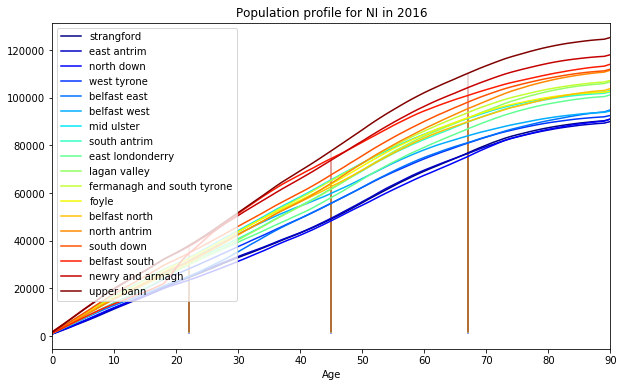

In [119]:
year_age_profile()

In [120]:
cons_pop_qilted=pd.DataFrame.from_dict(
    {
        qtile:cons_pop[(cons_pop.Gender == 'All persons') \
                       & (cons_pop.Mid_Year_Ending == 2018) \
                       & (lotile<cons_pop.Age) &(cons_pop.Age<=qtile)
                      ].groupby('constituency')['Population_Estimate'].sum()
        for lotile, qtile in zip([-1]+age_quartiles, age_quartiles+[90])
    }
)

In [121]:
cons_pop_qilted.idxmax(axis=1).sort_values()

constituency
west tyrone                   22
south down                    22
south antrim                  22
belfast west                  22
east londonderry              22
fermanagh and south tyrone    22
foyle                         22
newry and armagh              22
mid ulster                    22
north antrim                  45
belfast east                  45
belfast south                 45
belfast north                 45
upper bann                    45
lagan valley                  45
east antrim                   67
north down                    67
strangford                    67
dtype: int64

In [122]:
pop_years = cons_pop.Mid_Year_Ending.unique()
for c in en_df:
    if c not in pop_years:
        yr = pop_years[np.abs(pop_years-c).argmin()]
    else:
        yr=c
        
    _cons_pop = cons_pop[(cons_pop.Gender != 'All persons') \
                       & (cons_pop.Mid_Year_Ending == yr) \
                      ].groupby(['constituency', 'Gender'])['Population_Estimate'].sum().unstack().rename(columns=lambda c: c.lower())
    _cons_pop['total'] = _cons_pop.sum(axis=1)
    _cons_pop['m_per_f'] = _cons_pop['males']/_cons_pop['females']
    
    cons_pop_qilted=pd.DataFrame.from_dict(
        {
            qtile:cons_pop[(cons_pop.Gender == 'All persons') \
                           & (cons_pop.Mid_Year_Ending == yr) \
                           & (lotile<cons_pop.Age) &(cons_pop.Age<=qtile)
                          ].groupby('constituency')['Population_Estimate'].sum()
            for lotile, qtile in zip([-1]+age_quartiles, age_quartiles+[90])
        }
    )
    cons_stats[f"pop_{c}"] = _cons_pop['total']
    cons_stats[f"pop_{c}_males"] = _cons_pop['males']
    cons_stats[f"pop_{c}_females"] = _cons_pop['females']
    cons_stats[f"pop_{c}_m_per_f"] = _cons_pop['m_per_f']

    cons_stats[f"topqt_{c}"]=cons_pop_qilted.idxmax(axis=1)
    cons_stats[f"en_{c}_pc"]=cons_stats[f"en_{c}"]/cons_pop_qilted.sum(axis=1)
    
    cons_pop_mean=cons_pop[(cons_pop.Gender.isin(["All persons"])) & (cons_pop.Mid_Year_Ending == yr)]
    cons_pop_mean['popprod'] = cons_pop_mean[['Age','Population_Estimate']].product(axis=1)
    cons_pop_mean=cons_pop_mean.groupby('constituency')[['popprod','Population_Estimate']].sum(axis=0)
    cons_stats[f'age_{c}_avg'] = cons_pop_mean['popprod']/cons_pop_mean['Population_Estimate']
    try:
        cons_stats[f"av_{c}_pc"]=cons_stats[f"av_{c}"]/cons_pop_qilted.sum(axis=1)
    except:
        print(f"No data for av in {c}")

No data for av in 2009


### Average Age

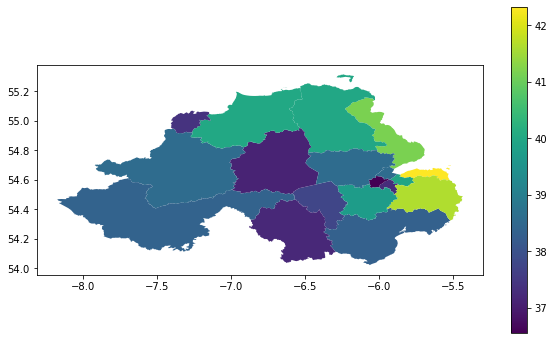

In [124]:
f,ax = plt.subplots(figsize=graph_figsize)
cons_stats.plot(column='age_2018_avg', legend=True, ax=ax)

### Top Quartile

Who rules the roost

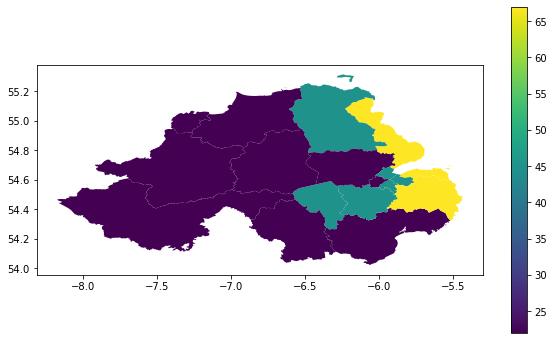

In [125]:
f,ax = plt.subplots(figsize=graph_figsize)
cons_stats.plot(column='topqt_2018', legend=True, ax=ax)

### Mars and Venus

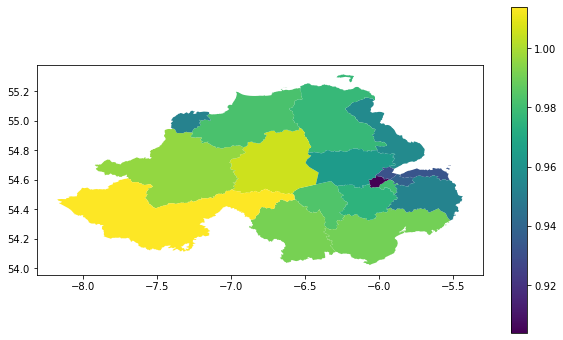

In [127]:
f,ax = plt.subplots(figsize=graph_figsize)
cons_stats.plot(column='pop_2018_m_per_f', legend=True, ax=ax)

### Enroled Pupils per Capita
Lagan Valley and South Antrim popping up again!

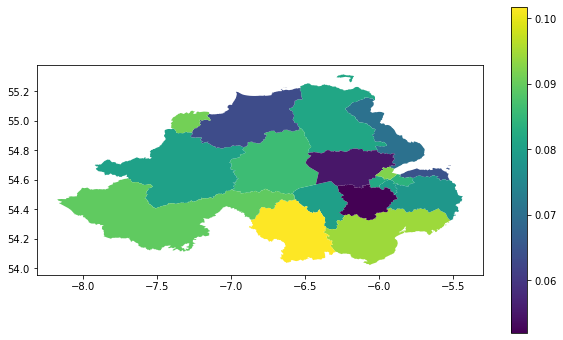

In [128]:
f,ax = plt.subplots(figsize=graph_figsize)
cons_stats.plot(column='en_2018_pc', legend=True, ax=ax)

### Available Places per Capita

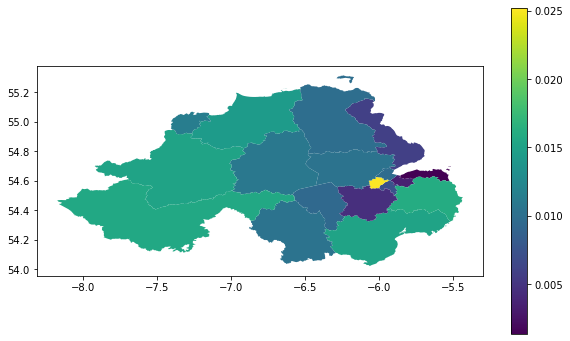

In [129]:
f,ax = plt.subplots(figsize=graph_figsize)
cons_stats.plot(column='av_2018_pc', legend=True, ax=ax)

### Free School Meals

In [130]:
fsm_df= pd.DataFrame.from_dict({
    con:
    fsm[:,reference.major_axis[(reference.minor_xs('parliamentary constituency')==con).any(axis=1)],'fsme'].sum()
    for con in cons
}).T.drop(np.nan)

for c in fsm_df:
    cons_stats[f"fsm_{c}"] = fsm_df[c]
    cons_stats[f"fsm_{c}_rat"] = (fsm_df[c]/en_df[c])

### FSM / Enrolled

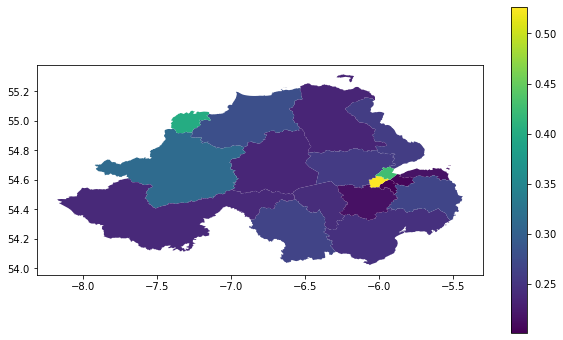

In [131]:
f,ax = plt.subplots(figsize=graph_figsize)
cons_stats.plot(column='fsm_2018_rat', legend=True, ax=ax)

### FSM is (loosly) a young persons problem

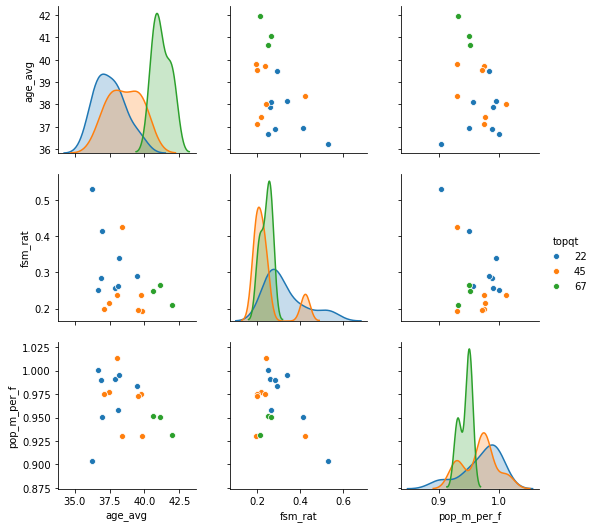

In [132]:
unyearify = lambda c:'_'.join([c.split('_')[0]]+c.split('_')[2:])
cons_stats_2018 = cons_stats[[c for c in cons_stats.columns if '2016' in c]].rename(columns=unyearify)

sns.pairplot(data=cons_stats_2018, hue='topqt',
             vars=['age_avg','fsm_rat','pop_m_per_f'])

### "I'm bored, make a GIF!"

In [134]:
cons_stats['en_2018_pk'].sort_values()

constituency
west tyrone                     3.758358
fermanagh and south tyrone      3.877875
east londonderry                5.060893
north antrim                    6.599166
mid ulster                      6.663019
south antrim                    7.245589
south down                      8.580430
east antrim                    10.731139
strangford                     10.986957
newry and armagh               11.292432
lagan valley                   12.121635
upper bann                     21.269880
foyle                          51.251716
north down                     51.455008
belfast east                  145.575392
belfast west                  171.879339
belfast north                 191.678771
belfast south                 205.419188
Name: en_2018_pk, dtype: float64

In [147]:
import matplotlib.animation as animation

unyearify = lambda c:'_'.join([c.split('_')[0]]+c.split('_')[2:])
years = list(range(2009,2019))
explanations={
    'age_avg': "Average Age",
    'av_pc': "Available School Places per capita",
    'av_rat': "Ratio of Available Places to Actualised Enrolment",
    'av': "Available School Places",
    'en_pc': "Enrolled Pupils per capita",
    'en_pk': "Enrolled Pupils per $km^2$",
    'en': "Enrolled Pupils",
    'fsm_rat': "Ratio of FSM pupils to total pupils",
    'fsm': "FSM pupils",
    'pop': "Population",
    'pop_females': "Population (F)",
    'pop_males': "Population (M)",
    'pop_m_per_f': "Ratio of Males to Females",
    'topqt': "Most populous age quartile (Age or younger)"
}

In [148]:
for metric in set(map(unyearify, cons_stats.columns)):
    for year in years:
        try:
            f, ax = plt.subplots(figsize=graph_figsize)
            if metric in explanations:
                ax.set_title(f"{explanations[metric]}:({year})")
            else:
                ax.set_title(f"{metric}:({year})")
                
            cons_stats[[c for c in cons_stats.columns if str(year) in c]+['geometry']]\
                .rename(columns=unyearify).plot(column=metric, legend=True, ax=ax)
            ax.axis('off')
            f.tight_layout()
            p = Path(f"outputs/{metric}/{year}.png")
            p.parent.mkdir(parents=True, exist_ok=True)
            f.savefig(p)
            plt.close(f)
            fps = 12
        except:
            print(f"{metric}:{year} failed")
        finally:
            if f:
                plt.close(f)

geometry:2009 failed
geometry:2010 failed
geometry:2011 failed
geometry:2012 failed
geometry:2013 failed
geometry:2014 failed
geometry:2015 failed
geometry:2016 failed
geometry:2017 failed
geometry:2018 failed
av_pc:2009 failed
av_rat:2009 failed
av:2009 failed


In [149]:
import moviepy.editor as mpy
import moviepy.video as mpyv
clips = {}
for p in Path('outputs/').iterdir():
    if not p.is_dir():
        continue
    metric = p.parts[-1]
    file_list = [str(_p) for _p in sorted(filter(lambda s:s.suffix=='.png', p.iterdir()))]
    clip = mpy.ImageSequenceClip(file_list, fps=1.5)
    clip = mpyv.fx.all.freeze(clip, t='end', freeze_duration=2)
    clip.write_gif(f"outputs/{metric}.gif")
    clips[metric]=clip
    


[MoviePy] Building file outputs/av_pc.gif with imageio


 92%|█████████▏| 12/13 [00:00<00:00, 21.65it/s]



[MoviePy] Building file outputs/grampct.gif with imageio


 80%|████████  | 4/5 [00:00<00:00, 15.46it/s]



[MoviePy] Building file outputs/pop.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 21.37it/s]



[MoviePy] Building file outputs/pop_males.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 23.06it/s]


[MoviePy] Building file outputs/av.gif with imageio



 92%|█████████▏| 12/13 [00:00<00:00, 22.79it/s]



[MoviePy] Building file outputs/en_pk.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 26.26it/s]



[MoviePy] Building file outputs/en_pc.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 22.28it/s]



[MoviePy] Building file outputs/age_avg.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 20.47it/s]



[MoviePy] Building file outputs/pairplot.gif with imageio


 92%|█████████▏| 11/12 [00:00<00:00, 13.84it/s]



[MoviePy] Building file outputs/fsm.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 19.28it/s]



[MoviePy] Building file outputs/pop_females.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 20.01it/s]



[MoviePy] Building file outputs/fsm_rat.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 21.72it/s]



[MoviePy] Building file outputs/pop_m_per_f.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 15.34it/s]


[MoviePy] Building file outputs/gram_pct.gif with imageio



 80%|████████  | 4/5 [00:00<00:00, 14.93it/s]



[MoviePy] Building file outputs/av_rat.gif with imageio


 92%|█████████▏| 12/13 [00:00<00:00, 21.43it/s]



[MoviePy] Building file outputs/en.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 21.62it/s]


[MoviePy] Building file outputs/topqt.gif with imageio



100%|██████████| 14/14 [00:00<00:00, 26.09it/s]



[MoviePy] Building file outputs/gram_rat.gif with imageio


 80%|████████  | 4/5 [00:00<00:00, 16.87it/s]



[MoviePy] Building file outputs/Population Distribution.gif with imageio


 92%|█████████▏| 12/13 [00:00<00:00, 22.25it/s]



[MoviePy] Building file outputs/Population Distribution _normed_.gif with imageio


 92%|█████████▏| 12/13 [00:00<00:00, 19.60it/s]


### We're getting older, or at least living longer
![](outputs/age_avg.gif)

### But younger people are taking over the west
![](outputs/topqt.gif)

### 💕 Go West for Men, or West Belfast for Women 💕 
10% fewer men than women in West Belfast, ~2% more men than women out west
![](outputs/pop_m_per_f.gif)

### Free School Meals are rising with population
![](outputs/fsm.gif)

### But the divide is getting wider per capita
![](outputs/fsm_rat.gif)

### There aren't necessarily fewer available school places either...
There just aren't any where people want to send their kids...

Could *possibly* indicate over-provisioning in yellow areas...
![](outputs/av_pc.gif)

### Population distribution isn't really changing at all
![](outputs/pop.gif)

### And as such, noones sending their kids anywhere differently despite closures...

![](outputs/en_pc.gif)

## Population Distribution Shifts

In [150]:
metric='Population Distribution'
for year in years:
    try:
        f, ax = plt.subplots(figsize=graph_figsize)
        if metric in explanations:
            ax.set_title(f"{explanations[metric]}:({year})")
        else:
            ax.set_title(f"{metric}:({year})")

        df = cons_pop[(cons_pop.Gender == 'All persons') \
                  & (cons_pop.Mid_Year_Ending == year)]\
            .groupby(['Age','constituency'])['Population_Estimate']\
            .sum().unstack()
        sns.heatmap(df.T, ax=ax)
        f.tight_layout()
        p = Path(f"outputs/{metric}/{year}.png")
        p.parent.mkdir(parents=True, exist_ok=True)
        f.savefig(p)
        plt.close(f)

        fps = 12
    except:
        print(f"{metric}:{year} failed")
    finally:
        if f:
            plt.close(f)
            
metric='Population Distribution _normed_'
for year in years:
    try:
        f, ax = plt.subplots(figsize=graph_figsize)
        if metric in explanations:
            ax.set_title(f"{explanations[metric]}:({year})")
        else:
            ax.set_title(f"{metric}:({year})")

        df = cons_pop[(cons_pop.Gender == 'All persons') \
                  & (cons_pop.Mid_Year_Ending == year)]\
            .groupby(['Age','constituency'])['Population_Estimate']\
            .sum().unstack()
        sns.heatmap(colnorm(df.T), ax=ax)
        f.tight_layout()
        p = Path(f"outputs/{metric}/{year}.png")
        p.parent.mkdir(parents=True, exist_ok=True)
        f.savefig(p)
        plt.close(f)

        fps = 12
    except:
        print(f"{metric}:{year} failed")
    finally:
        if f:
            plt.close(f)

clips = {}
for p in Path('outputs/').iterdir():
    if not p.is_dir():
        continue
    metric = p.parts[-1]
    file_list = [str(_p) for _p in sorted(filter(lambda s:s.suffix=='.png', p.iterdir()))]
    clip = mpy.ImageSequenceClip(file_list, fps=1.5)
    clip = mpyv.fx.all.freeze(clip, t='end', freeze_duration=2)
    clip.write_gif(f"outputs/{metric}.gif")
    clips[metric]=clip
    


[MoviePy] Building file outputs/av_pc.gif with imageio


 92%|█████████▏| 12/13 [00:00<00:00, 23.21it/s]


[MoviePy] Building file outputs/grampct.gif with imageio



 80%|████████  | 4/5 [00:00<00:00, 15.65it/s]



[MoviePy] Building file outputs/pop.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 23.14it/s]



[MoviePy] Building file outputs/pop_males.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 23.98it/s]


[MoviePy] Building file outputs/av.gif with imageio



 92%|█████████▏| 12/13 [00:00<00:00, 22.89it/s]



[MoviePy] Building file outputs/en_pk.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 23.46it/s]



[MoviePy] Building file outputs/en_pc.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 20.55it/s]



[MoviePy] Building file outputs/age_avg.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 19.87it/s]



[MoviePy] Building file outputs/pairplot.gif with imageio


 92%|█████████▏| 11/12 [00:00<00:00, 13.56it/s]



[MoviePy] Building file outputs/fsm.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 22.23it/s]



[MoviePy] Building file outputs/pop_females.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 21.60it/s]


[MoviePy] Building file outputs/fsm_rat.gif with imageio



100%|██████████| 14/14 [00:00<00:00, 24.76it/s]



[MoviePy] Building file outputs/pop_m_per_f.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 21.88it/s]



[MoviePy] Building file outputs/gram_pct.gif with imageio


 80%|████████  | 4/5 [00:00<00:00, 15.57it/s]



[MoviePy] Building file outputs/av_rat.gif with imageio


 92%|█████████▏| 12/13 [00:00<00:00, 21.79it/s]



[MoviePy] Building file outputs/en.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 21.56it/s]



[MoviePy] Building file outputs/topqt.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 20.91it/s]



[MoviePy] Building file outputs/gram_rat.gif with imageio


 80%|████████  | 4/5 [00:00<00:00, 14.44it/s]



[MoviePy] Building file outputs/Population Distribution.gif with imageio


100%|██████████| 14/14 [00:00<00:00, 22.45it/s]


[MoviePy] Building file outputs/Population Distribution _normed_.gif with imageio



100%|██████████| 14/14 [00:00<00:00, 21.59it/s]


<img src="outputs/Population Distribution.gif"/>

<img src="outputs/Population Distribution _normed_.gif"/>

# Conclusions
## Hypotheses / conjectures
* East Antrim Constituency is literally 'little britain'
* None wants to go to school in West Belfast for some reason
* Everyone wants to go to school in North Down
* The 'places' scandal is either over blown, or more related to 'preference'
* There is a demographic wave of <11's that is gonna hit education system in 2 years. Good luck.
* South Belfast steals all-the-18-year-olds, keeps em for a decade or so and then the go home
* Foyle has been experiencing a sustained brain drain of < 35's that is now impacting services

## Final Comments
* Data is hard
* Open Data is hard without a budget
* 80/20 rule is more like 90/10

# Idiots Guide to (Open) Data Science

Andrew Bolster 
* [bolster.online](https://bolster.online)
* Tweets [@bolster](https://twitter.bolster.online)
* GitHubs at [andrewbolster](https://github.com/andrewbolster)
* Machine Learning Team Lead at [WhiteHatSec](https://www.whitehatsec.com) 
 * **We're hiring** (Placements also available)
* Plays at [Farset Labs](https://www.farsetlabs.org.uk)
* **[THIS NOTEBOOK IS AT present.bolster.online](http://present.bolster.online)**
* [Also available in source at presentgh.bolster.online](http://presentgh.bolster.online)

### NOTES FOR LATER

#### Fucked Notes:
##### DoE
* inconsistent file names
* inconsistent extensions
* inconsistent cases in extentions 🤦‍
* changing schema almost every year
* recent years don't have headers for de ref/school name
* multi row headers
* Changing "All People" to "All persons" silently...


#### Housing Stock Data
https://www.opendatani.gov.uk/dataset/ni-housing-stock


#### SEN scaling is complex AF
https://www.education-ni.gov.uk/sites/default/files/publications/de/the-code-of-practice.pdf

~ hundred page doc to work out that 5 is 'confirmed and fully stated special educational needs. Everthing less is 'suspected and in need of advice and support'

"Controlled and Maintained schools have [a budget] for this"
"Grant maintained integrated schools also receive this through their annual budget"